***Importing Libraries***

In [1015]:
import warnings #Used to manage warning messages in Python
import sys #Provides access to system-specific parameters and functions
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import pandas as pd #A powerful library for data manipulation and analysis
import numpy as np #Focused on numerical computations. It provides support for arrays, matrices, and mathematical functions
import matplotlib.pyplot as plt #used for creating static, interactive, and animated visualizations like line plots, bar graphs, histograms, etc.
import seaborn as sns #this library simplifies creating visually appealing and informative statistical graphics such as heatmaps and pair plots
 
from scipy.stats import skew # tools for statistical computations such as calculating skewness, probability distributions, and hypothesis testing.

# Import Counter from collections
# from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, chi2,f_regression,f_classif
from sklearn.linear_model import LinearRegression #Implements a simple and commonly used linear regression algorithm for predicting continuous outcomes.
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor # decision tree regression model that splits the data into regions to make 
                                               #predictions based on tree-like structures.
from sklearn.ensemble import RandomForestRegressor  # A powerful regression model that uses collection of decision trees to improve predictions 
from sklearn.ensemble import GradientBoostingRegressor # method that builds models iteratively to correct the errors of its predecessors 
                                                        #for achieving high accuracy
from sklearn.svm import SVR # Implements Support Vector Regression, a technique that aims to fit the best possible hyperplane for predicting 
                            #continuous values
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler #Used for feature scaling in machine learning.
from sklearn.model_selection import train_test_split #Splits datasets into training and testing subsets
# from sklearn.linear_model import LinearRegression #Implements a simple and commonly used linear regression algorithm for predicting continuous outcomes. 
                                                   # eg: predicting the length of hospital stays based on patient demographics and conditions
from sklearn.metrics import mean_squared_error



***load data for pre proccessing***

In [1018]:
# Specify the path to your CSV file
csv_file_path = ('C:/Users/asus/healthcare-dataset.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv('healthcare-dataset.csv')

# Display the first few rows of the dataset
display(df.head(10))


encounter_id  patient_id                 name  age  gender blood_type  \
0             1    48559735      Tiffany Ramirez   81  Female         O-   
1             2    68988993          Ruben Burns   35    Male         O+   
2             3    57429465            Chad Byrd   61    Male         B-   
3             4    44487379    Antonio Frederick   49    Male         B-   
4             5    57789449  Mrs. Brandy Flowers   51    Male         O-   
5             6    92656382       Patrick Parker   41    Male        AB+   
6             7    75616756       Charles Horton   82    Male        AB+   
7             8    82900421         Patty Norman   55  Female         O-   
8             9    43828145           Ryan Hayes   33    Male         A+   
9            10    65979398         Sharon Perez   39  Female         O-   

  medical_condition  doctor_id           doctor  hospital_id  \
0          Diabetes      24379   Patrick Parker         8130   
1            Asthma      54845    Diane Jackson         7856   
2           Obesity      88087       Paul Baker         4494   
3            Asthma      22426   Brian Chandler         8117   
4         Arthritis      84765   Dustin Griffin         7259   
5         Arthritis      14020      Robin Green         1256   
6      Hypertension      39306  Patricia Bishop         6810   
7         Arthritis      79748    Brian Kennedy         5228   
8          Diabetes      90980     Kristin Dunn         9540   
9            Asthma      18692   Jessica Bailey         7152   

                    hospital  insurance_provider_id insurance_provider  \
0           Wallace-Hamilton                  17536           Medicare   
1  Burke, Griffin and Cooper                  97562   UnitedHealthcare   
2                 Walton LLC                  36710           Medicare   
3                 Garcia Ltd                  70210           Medicare   
4    Jones, Brown and Murray                  92038   UnitedHealthcare   
5                   Boyd PLC                  41362              Aetna   
6  Wheeler, Bryant and Johns                  75062              Cigna   
7                  Brown Inc                  71030         Blue Cross   
8  Smith, Edwards and Obrien                  40027              Aetna   
9               Brown-Golden                  75453         Blue Cross   

   billing_amount  room_number admission_type date_of_admission  \
0    37490.983364          146       Elective        2022-11-17   
1    47304.064845          404      Emergency        2023-06-01   
2    36874.896997          292      Emergency        2019-01-09   
3    23303.322092          480         Urgent        2020-05-02   
4    18086.344184          477         Urgent        2021-07-09   
5    22522.363385          180         Urgent        2020-08-20   
6    39593.435761          161         Urgent        2021-03-22   
7    13546.817249          384       Elective        2019-05-16   
8    24903.037270          215       Elective        2020-12-17   
9    22788.236026          310         Urgent        2022-12-15   

  discharge_date   medication  test_results  length_of_stay  
0     2022-12-01      Aspirin  Inconclusive              14  
1     2023-06-15      Lipitor        Normal              14  
2     2019-02-08      Lipitor        Normal              30  
3     2020-05-03   Penicillin      Abnormal               1  
4     2021-08-02  Paracetamol        Normal              24  
5     2020-08-23      Aspirin      Abnormal               3  
6     2021-04-15      Lipitor      Abnormal              24  
7     2019-06-02      Aspirin        Normal              17  
8     2020-12-22      Aspirin      Abnormal               5  
9     2022-12-16      Aspirin        Normal               1

***To print the dimensions of a DataFrame*** 

In [1021]:
df.shape

(10000, 21)

***To print the index range,column names & count of non_null  values***

In [1024]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   encounter_id           10000 non-null  int64  
 1   patient_id             10000 non-null  int64  
 2   name                   10000 non-null  object 
 3   age                    10000 non-null  int64  
 4   gender                 10000 non-null  object 
 5   blood_type             10000 non-null  object 
 6   medical_condition      10000 non-null  object 
 7   doctor_id              10000 non-null  int64  
 8   doctor                 10000 non-null  object 
 9   hospital_id            10000 non-null  int64  
 10  hospital               10000 non-null  object 
 11  insurance_provider_id  10000 non-null  int64  
 12  insurance_provider     10000 non-null  object 
 13  billing_amount         10000 non-null  float64
 14  room_number            10000 non-null  int64  
 15  adm

***To get summary of statistical measures for the numerical columns***

In [1027]:
df.describe()

encounter_id    patient_id           age     doctor_id   hospital_id  \
count   10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean     5000.50000  5.499700e+07     51.452200  55276.378200   5570.275300   
std      2886.89568  2.591835e+07     19.588974  26057.500342   2593.517205   
min         1.00000  1.000220e+07     18.000000  10039.000000   1000.000000   
25%      2500.75000  3.262032e+07     35.000000  32990.250000   3347.750000   
50%      5000.50000  5.523416e+07     52.000000  54996.500000   5610.000000   
75%      7500.25000  7.735011e+07     68.000000  77987.250000   7835.250000   
max     10000.00000  9.999747e+07     85.000000  99997.000000   9997.000000   

       insurance_provider_id  billing_amount   room_number  length_of_stay  
count           10000.000000    10000.000000  10000.000000    10000.000000  
mean            55131.390700    25516.806778    300.082000       15.561800  
std             26074.784197    14067.292709    115.806027        8.612038  
min             10003.000000     1000.180837    101.000000        1.000000  
25%             32650.500000    13506.523967    199.000000        8.000000  
50%             55713.000000    25258.112566    299.000000       16.000000  
75%             77361.750000    37733.913727    400.000000       23.000000  
max             99997.000000    49995.902283    500.000000       30.000000

***To get the statistical summary for categorical columns***

In [1030]:
df.describe(include=['object', 'category'])


name  gender blood_type medical_condition           doctor  \
count             10000   10000      10000             10000            10000   
unique             9378       2          8                 6             9416   
top     Michael Johnson  Female        AB-            Asthma  Michael Johnson   
freq                  7    5075       1275              1708                7   

         hospital insurance_provider admission_type date_of_admission  \
count       10000              10000          10000             10000   
unique       8639                  5              3              1815   
top     Smith PLC              Cigna         Urgent        2019-04-12   
freq           19               2040           3391                15   

       discharge_date  medication test_results  
count           10000       10000        10000  
unique           1834           5            3  
top        2021-11-28  Penicillin     Abnormal  
freq               14        2079         3456

# ***<span style="color: red;">Analyzing Healthcare data (Exploratory Data Analysis</span>***

In [1033]:
# Display the counts of each value in the SEX column
df['gender'].value_counts()

gender
Female    5075
Male      4925
Name: count, dtype: int64

<Axes: xlabel='gender'>

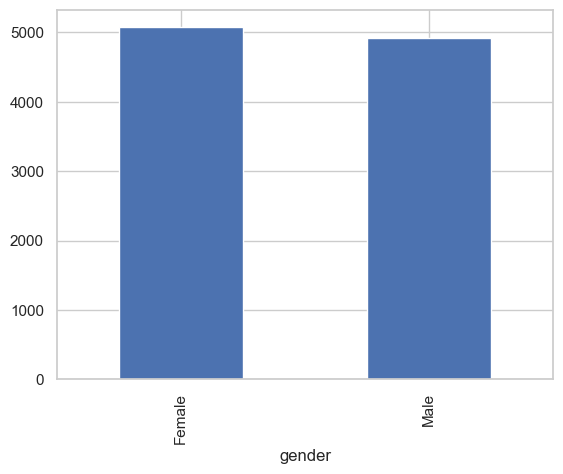

In [1035]:
#Visualizing this distribution can be done easily using the in-built plot function of Pandas.

# plot the value counts of sex 
df['gender'].value_counts().plot.bar()

In [1037]:
# Display the counts of each value in the SEX column
df['age'].value_counts()

age
59    175
78    174
31    172
20    169
35    169
     ... 
34    125
47    125
85    123
22    123
45    120
Name: count, Length: 68, dtype: int64

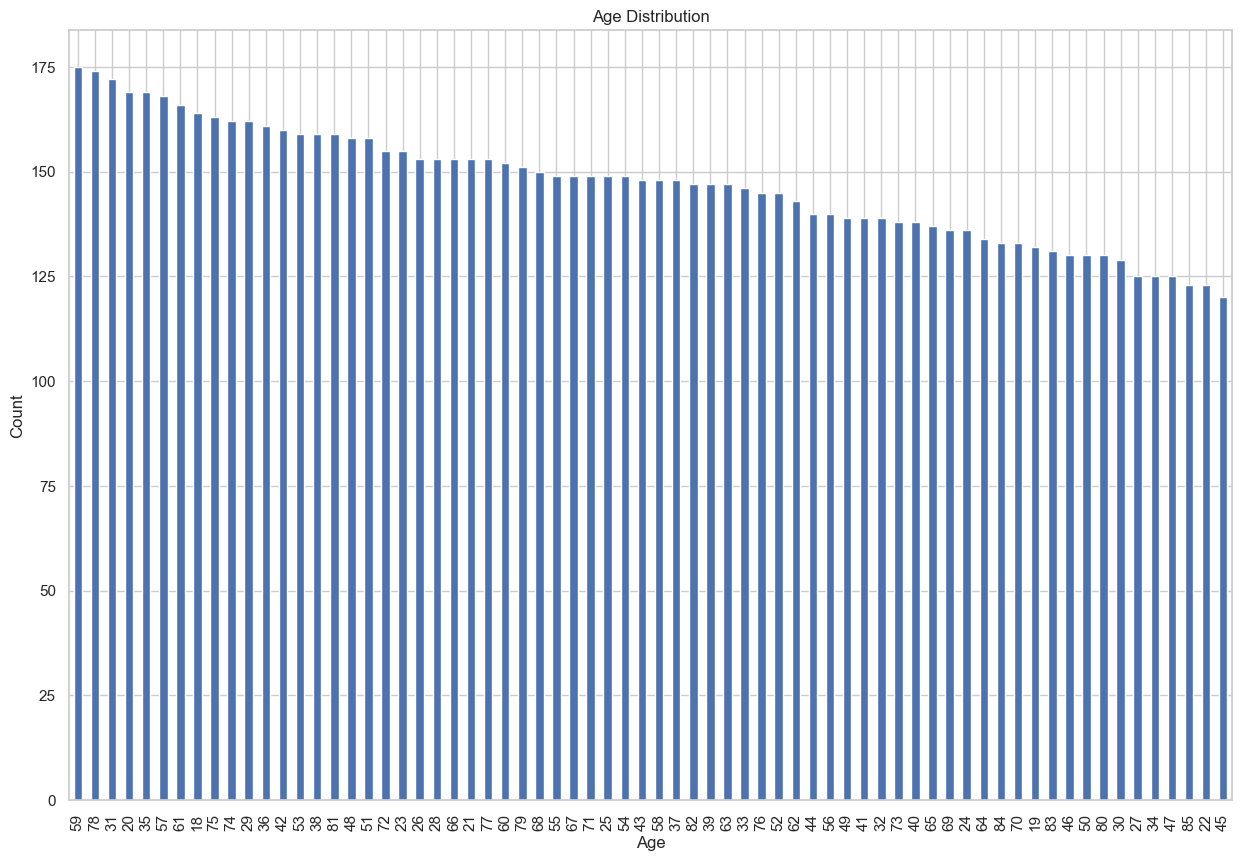

In [1039]:
# plot the value counts of Age
fig, ax = plt.subplots(figsize=(15, 10))  
df['age'].value_counts().plot.bar(ax=ax)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [1040]:
df['blood_type'].value_counts()

blood_type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

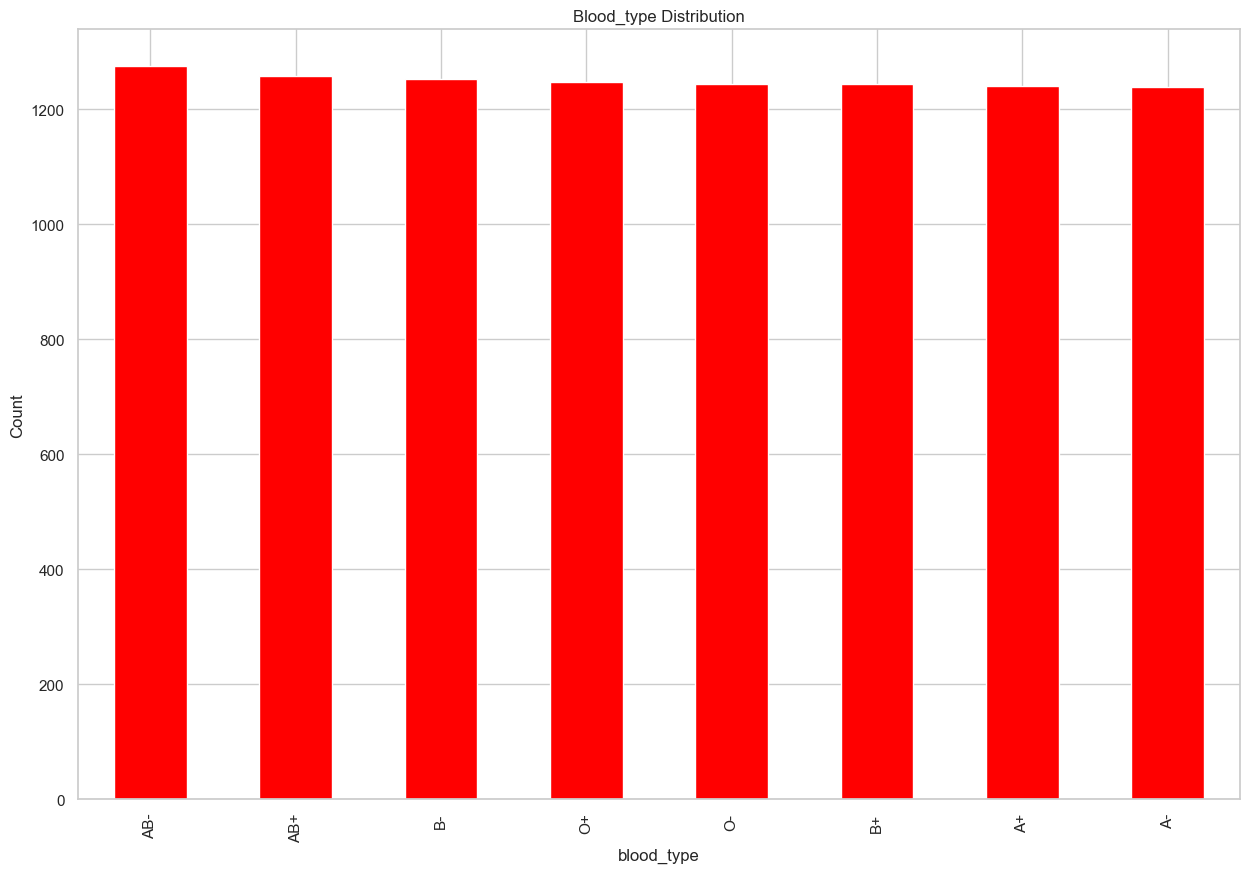

In [1041]:

fig, ax = plt.subplots(figsize=(15, 10))  
df['blood_type'].value_counts().plot.bar(ax=ax,color='red')
plt.title("Blood_type Distribution")
plt.xlabel("blood_type")
plt.ylabel("Count")
plt.show()

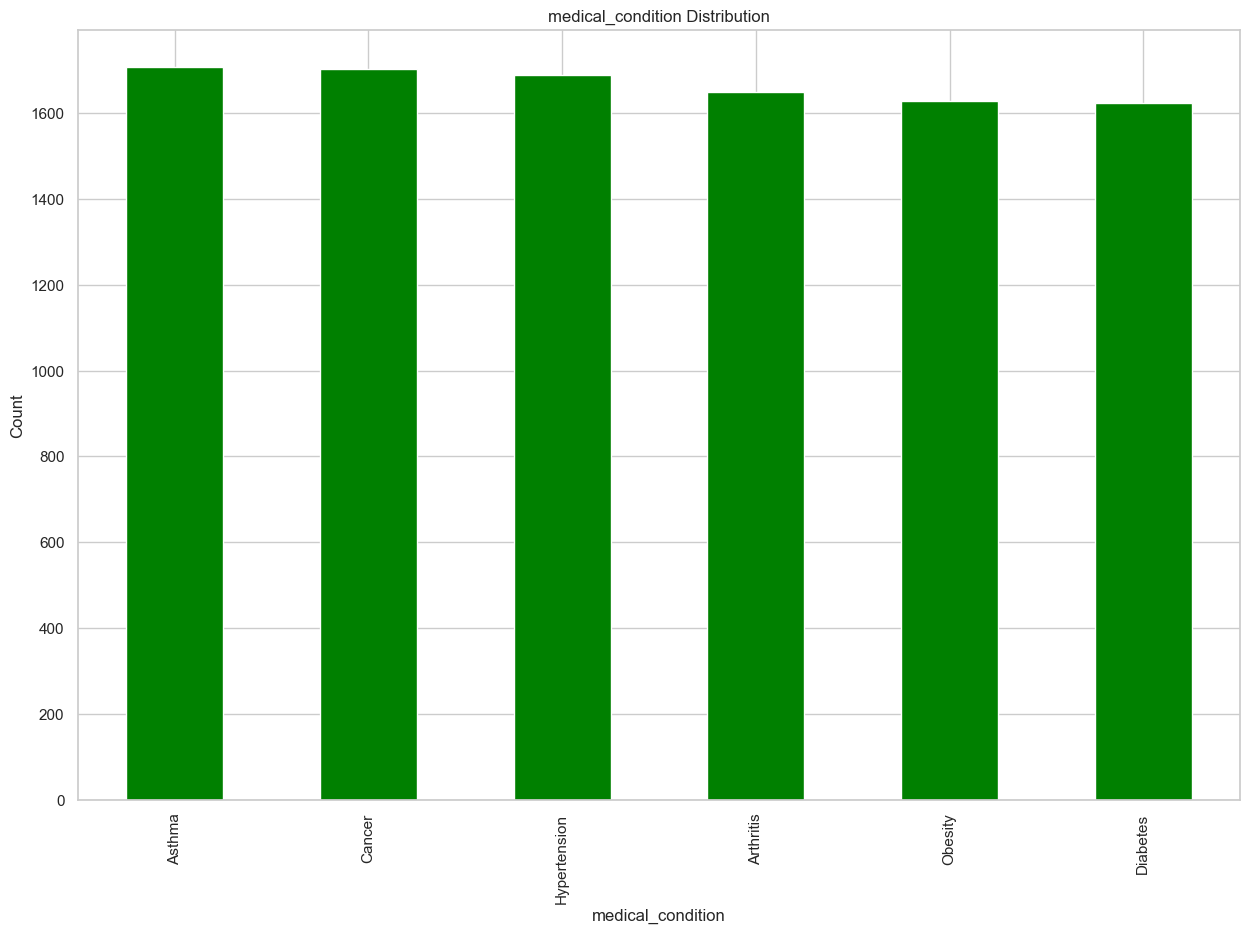

In [1042]:
fig, ax = plt.subplots(figsize=(15, 10))  
df['medical_condition'].value_counts().plot.bar(ax=ax,color='green')
plt.title("medical_condition Distribution")
plt.xlabel("medical_condition")
plt.ylabel("Count")
plt.show()

In [1043]:
df['doctor'].value_counts()

doctor
Michael Johnson      7
Robert Brown         5
Michelle Anderson    5
Matthew Smith        5
Jennifer Smith       5
                    ..
Sandra Howard        1
Steven Fuller        1
Benjamin Lawson      1
Allison Woods        1
Tasha Avila          1
Name: count, Length: 9416, dtype: int64

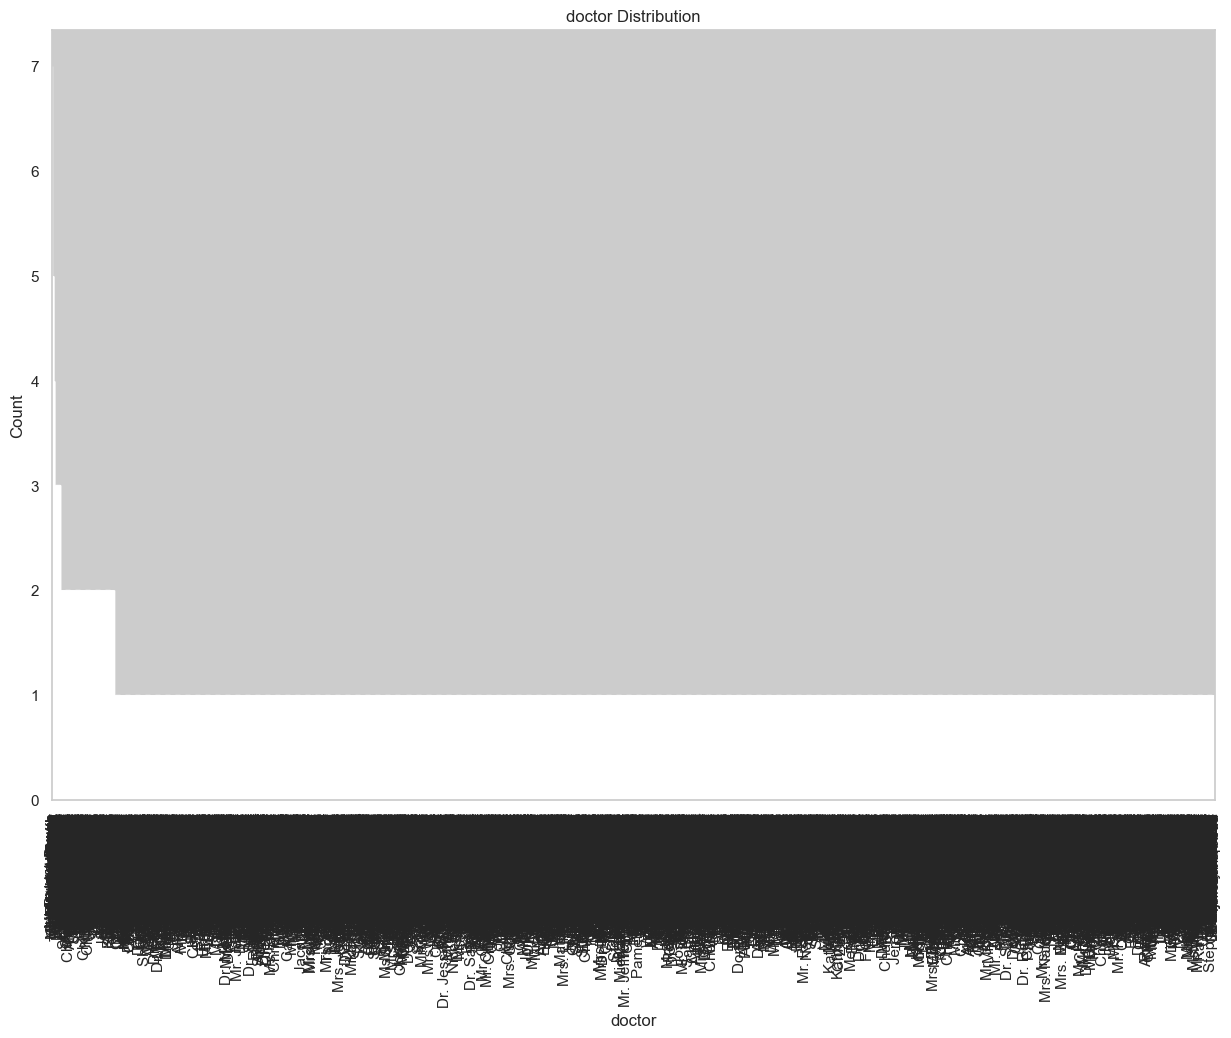

In [1046]:
fig, ax = plt.subplots(figsize=(15, 10))  
df['doctor'].value_counts().plot.bar(ax=ax)
plt.title("doctor Distribution")
plt.xlabel("doctor")
plt.ylabel("Count")
plt.show()

In [1047]:
df['hospital'].value_counts()

hospital
Smith PLC                        19
Smith and Sons                   17
Smith Ltd                        14
Smith Inc                        14
Johnson PLC                      13
                                 ..
Daniel-Benton                     1
Franco, Hicks and Anderson        1
Berry PLC                         1
Martinez, Johnson and Carlson     1
Torres, Young and Stewart         1
Name: count, Length: 8639, dtype: int64

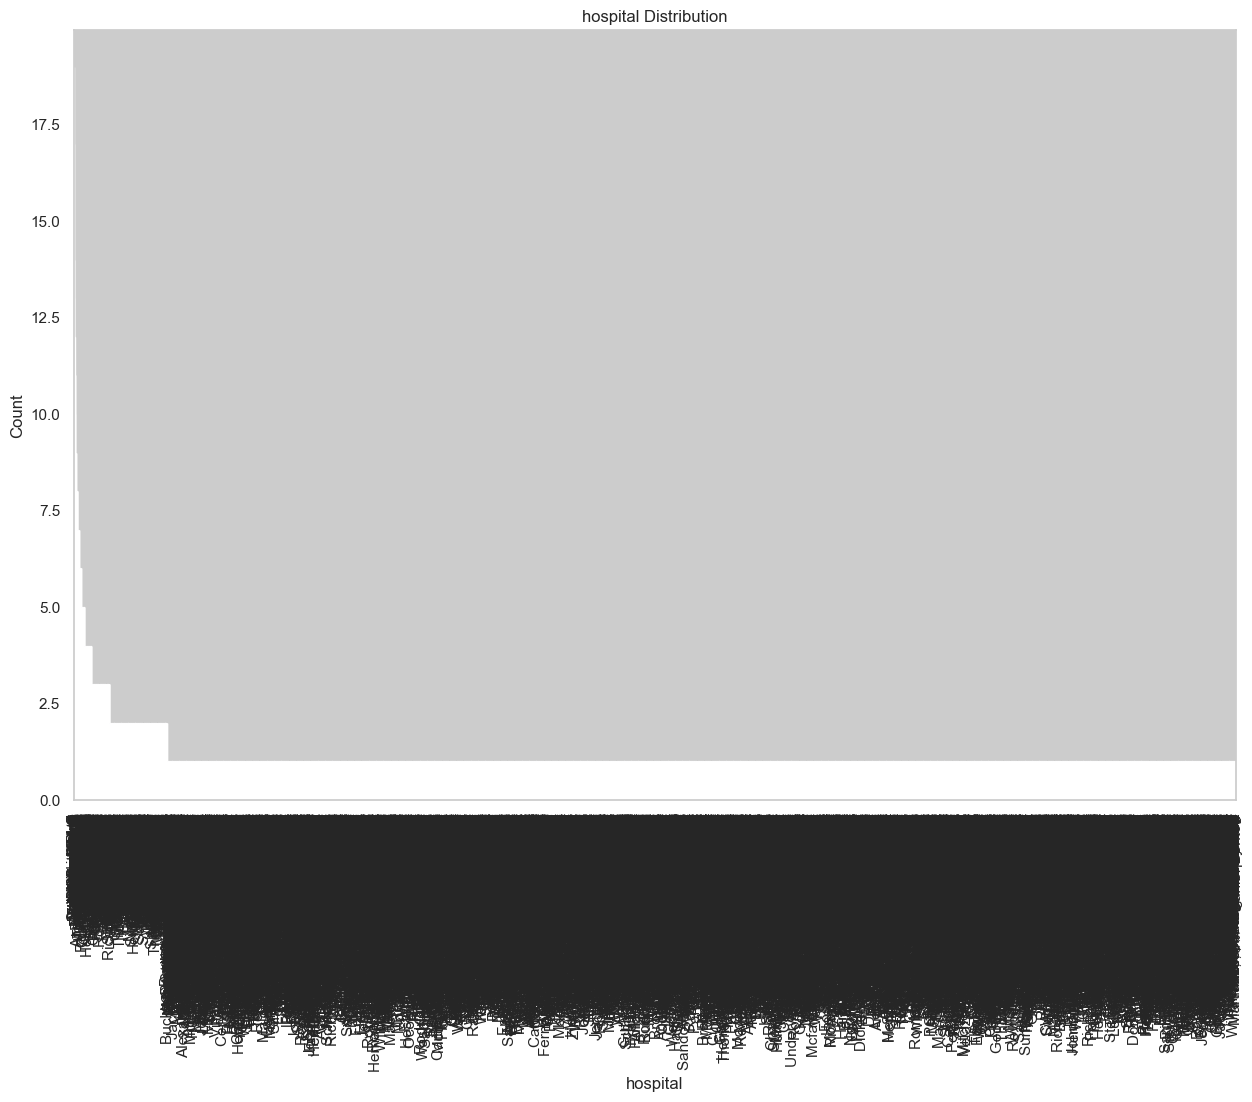

In [1049]:
fig, ax = plt.subplots(figsize=(15, 10))  
df['hospital'].value_counts().plot.bar(ax=ax)
plt.title("hospital Distribution")
plt.xlabel("hospital")
plt.ylabel("Count")
plt.show()

In [1052]:
df['insurance_provider'].value_counts()

insurance_provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64

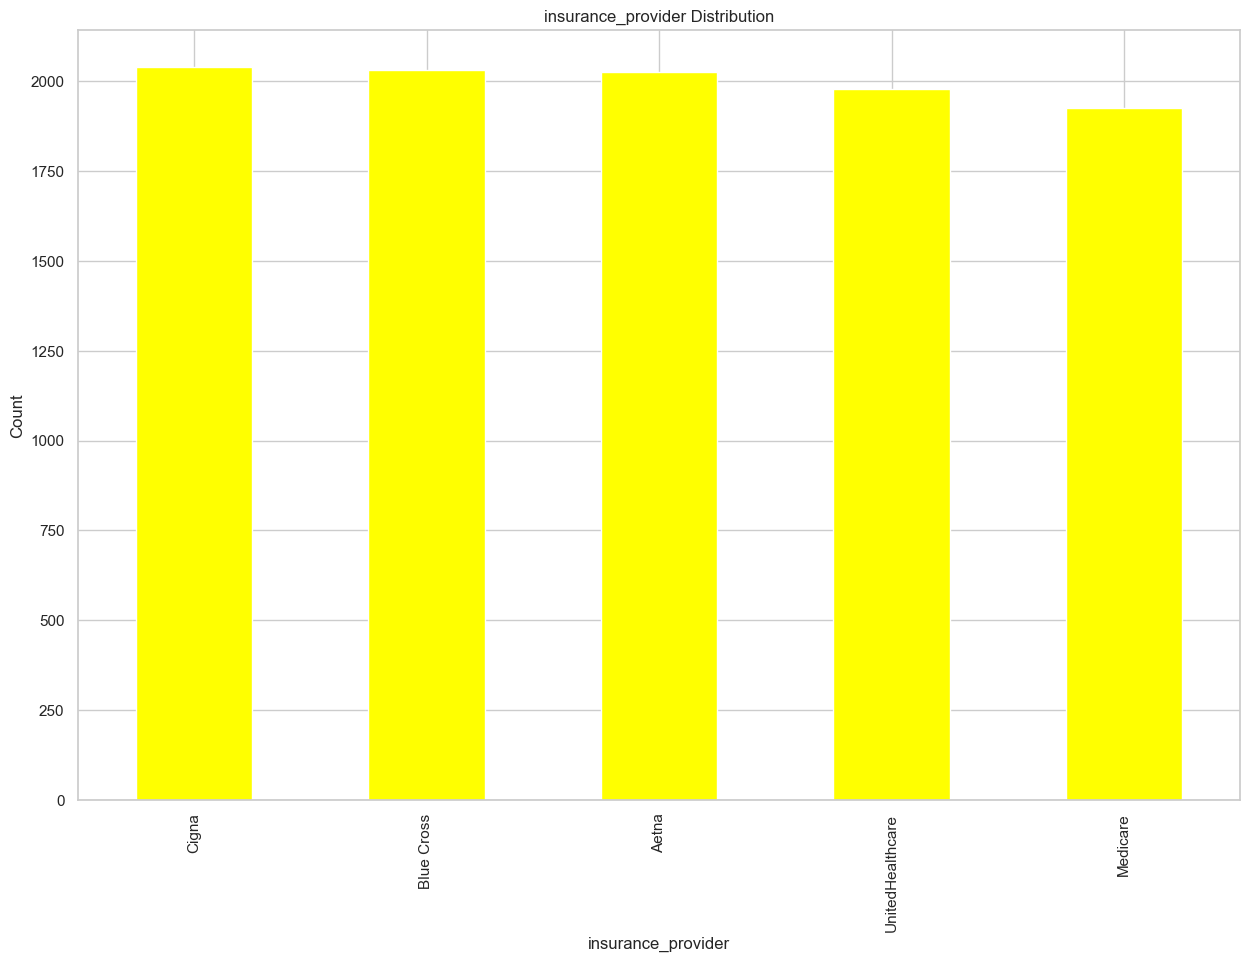

In [1053]:
fig, ax = plt.subplots(figsize=(15, 10))  
df['insurance_provider'].value_counts().plot.bar(ax=ax,color='yellow')
plt.title("insurance_provider Distribution")
plt.xlabel("insurance_provider")
plt.ylabel("Count")
plt.show()

In [1054]:
df['billing_amount'].value_counts()

billing_amount
37490.983364    1
33332.570385    1
19166.455615    1
26645.338403    1
45729.371668    1
               ..
37737.131216    1
39381.222526    1
47682.625945    1
31911.055695    1
37223.965865    1
Name: count, Length: 10000, dtype: int64

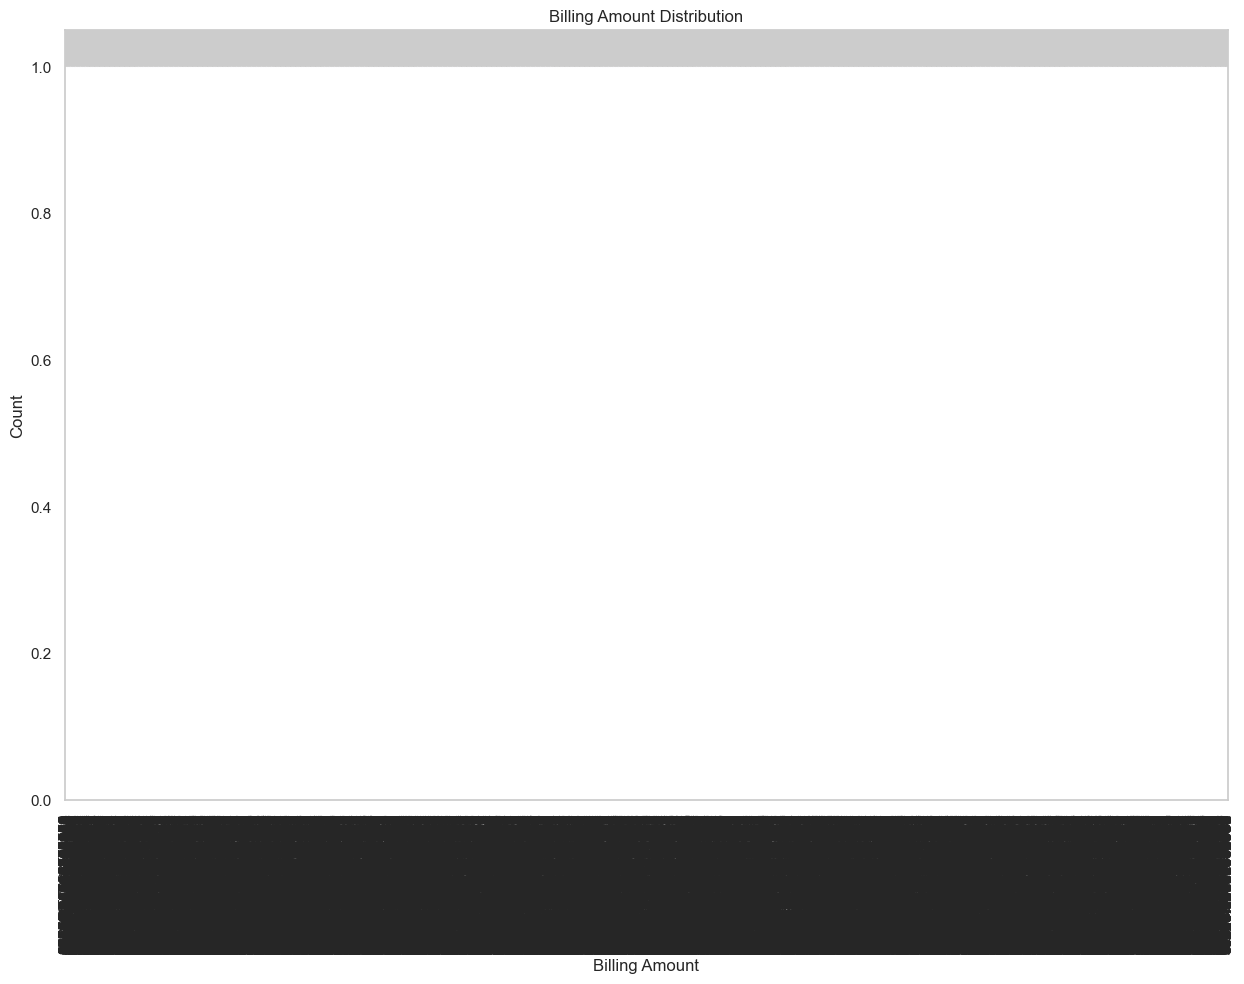

In [1055]:
fig, ax = plt.subplots(figsize=(15, 10))  
df['billing_amount'].value_counts().plot.bar(ax=ax, color='blue')  # Corrected column name
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount")
plt.ylabel("Count")
plt.show()


In [1056]:
df['admission_type'].value_counts()

admission_type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64

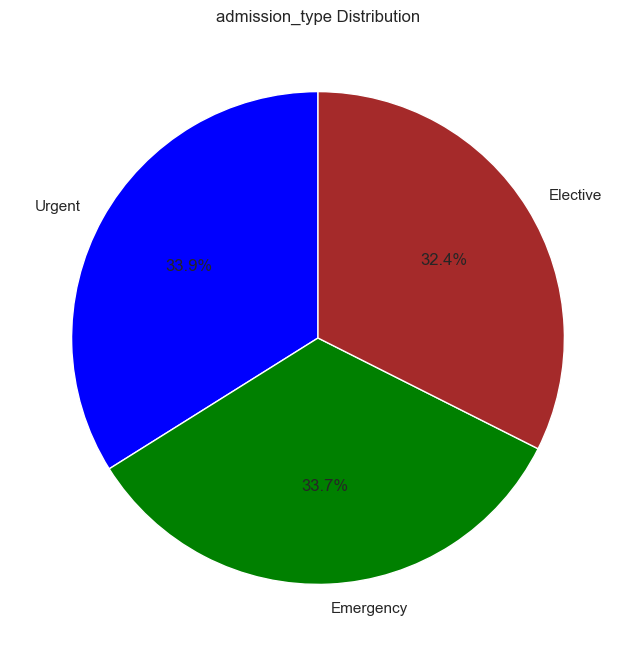

In [1057]:

labels = df['admission_type'].value_counts().index  
sizes = df['admission_type'].value_counts().values  
# Creating the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['blue','green', 'brown'], startangle=90)
plt.title("admission_type Distribution")
plt.show()


In [1058]:
df['test_results'].value_counts()

test_results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64

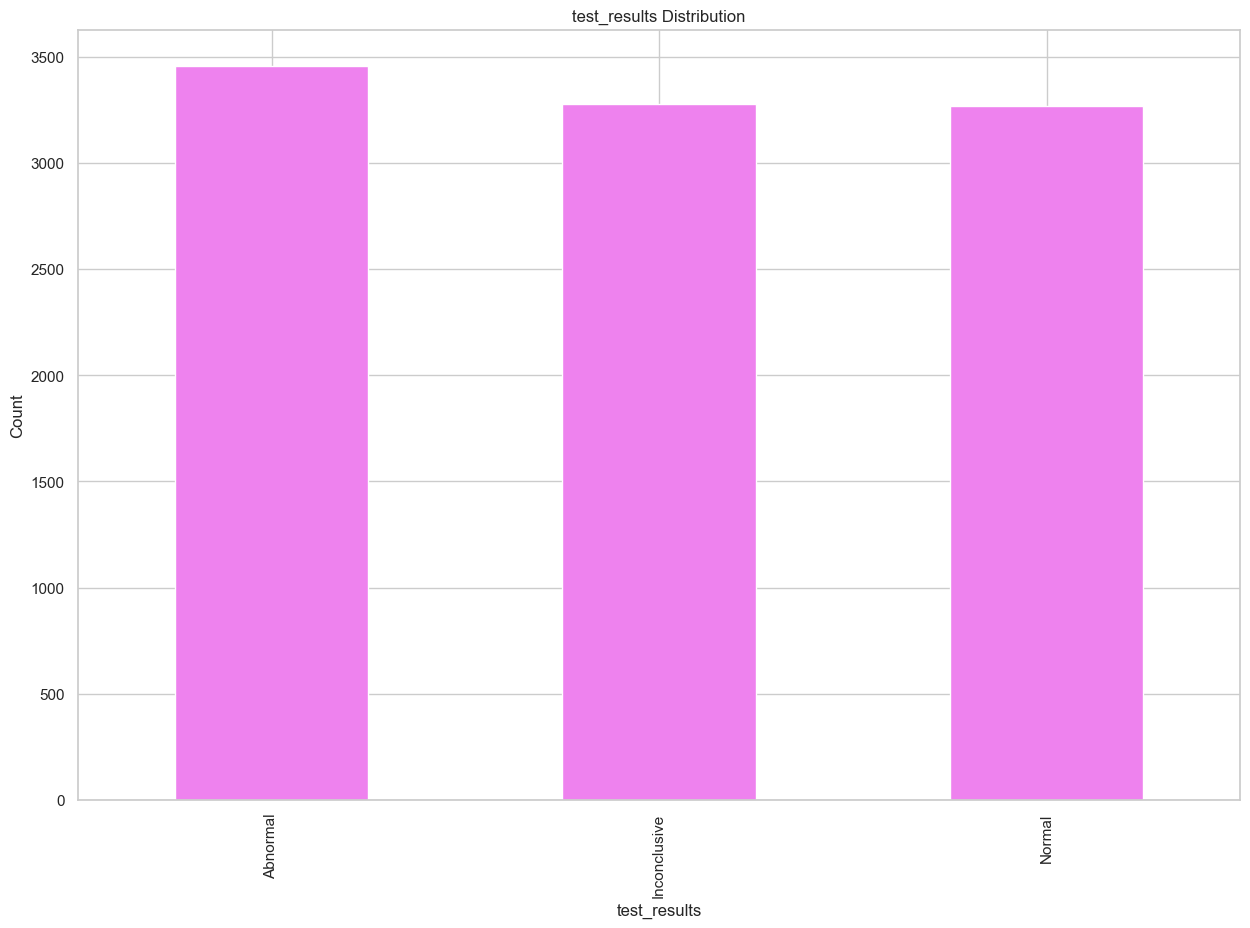

In [1059]:
fig, ax = plt.subplots(figsize=(15, 10))  
df['test_results'].value_counts().plot.bar(ax=ax, color='violet')  # Corrected column name
plt.title("test_results Distribution")
plt.xlabel("test_results")
plt.ylabel("Count")
plt.show()

In [1061]:
df['medication'].value_counts()

medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64

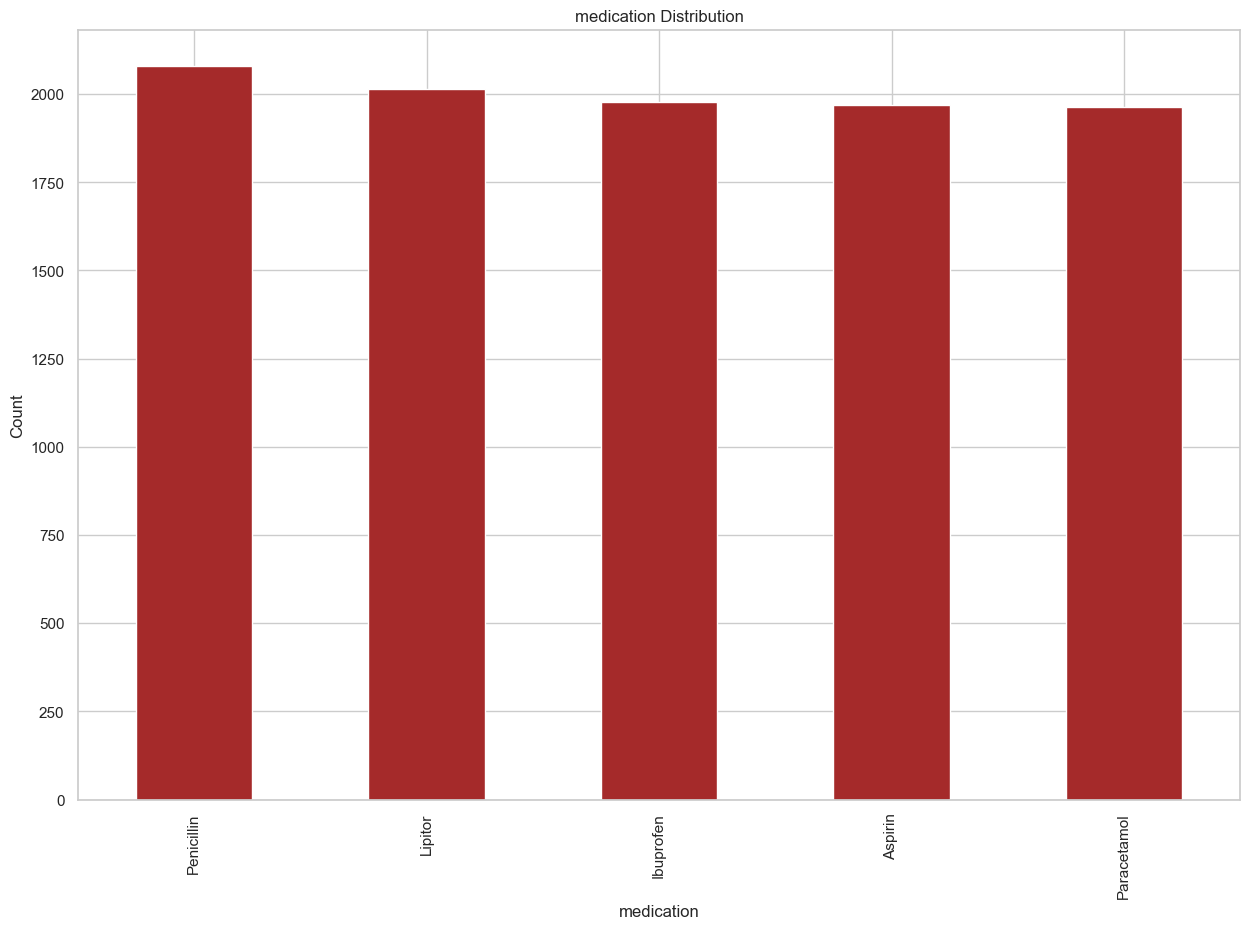

In [1062]:
fig, ax = plt.subplots(figsize=(15, 10))  
df['medication'].value_counts().plot.bar(ax=ax, color='brown')  # Corrected column name
plt.title("medication Distribution")
plt.xlabel("medication")
plt.ylabel("Count")
plt.show()

In [1063]:
df['length_of_stay'].value_counts().sort_index()

length_of_stay
1     313
2     303
3     339
4     326
5     311
6     362
7     358
8     352
9     306
10    336
11    316
12    354
13    314
14    355
15    336
16    349
17    330
18    323
19    340
20    339
21    326
22    314
23    336
24    343
25    336
26    367
27    323
28    353
29    310
30    330
Name: count, dtype: int64

<Axes: xlabel='stay_group'>

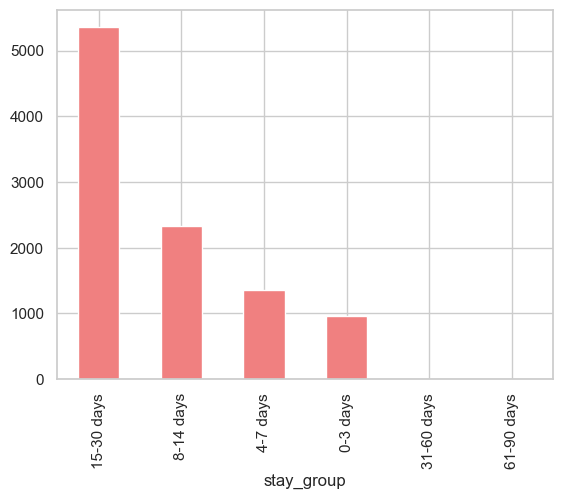

In [1064]:
bins = [0, 3, 7, 14, 30, 60, 90]  # Define meaningful ranges
labels = ['0-3 days', '4-7 days', '8-14 days', '15-30 days', '31-60 days', '61-90 days']
df['stay_group'] = pd.cut(df['length_of_stay'], bins=bins, labels=labels)

df['stay_group'].value_counts().plot(kind='bar', color='lightcoral')


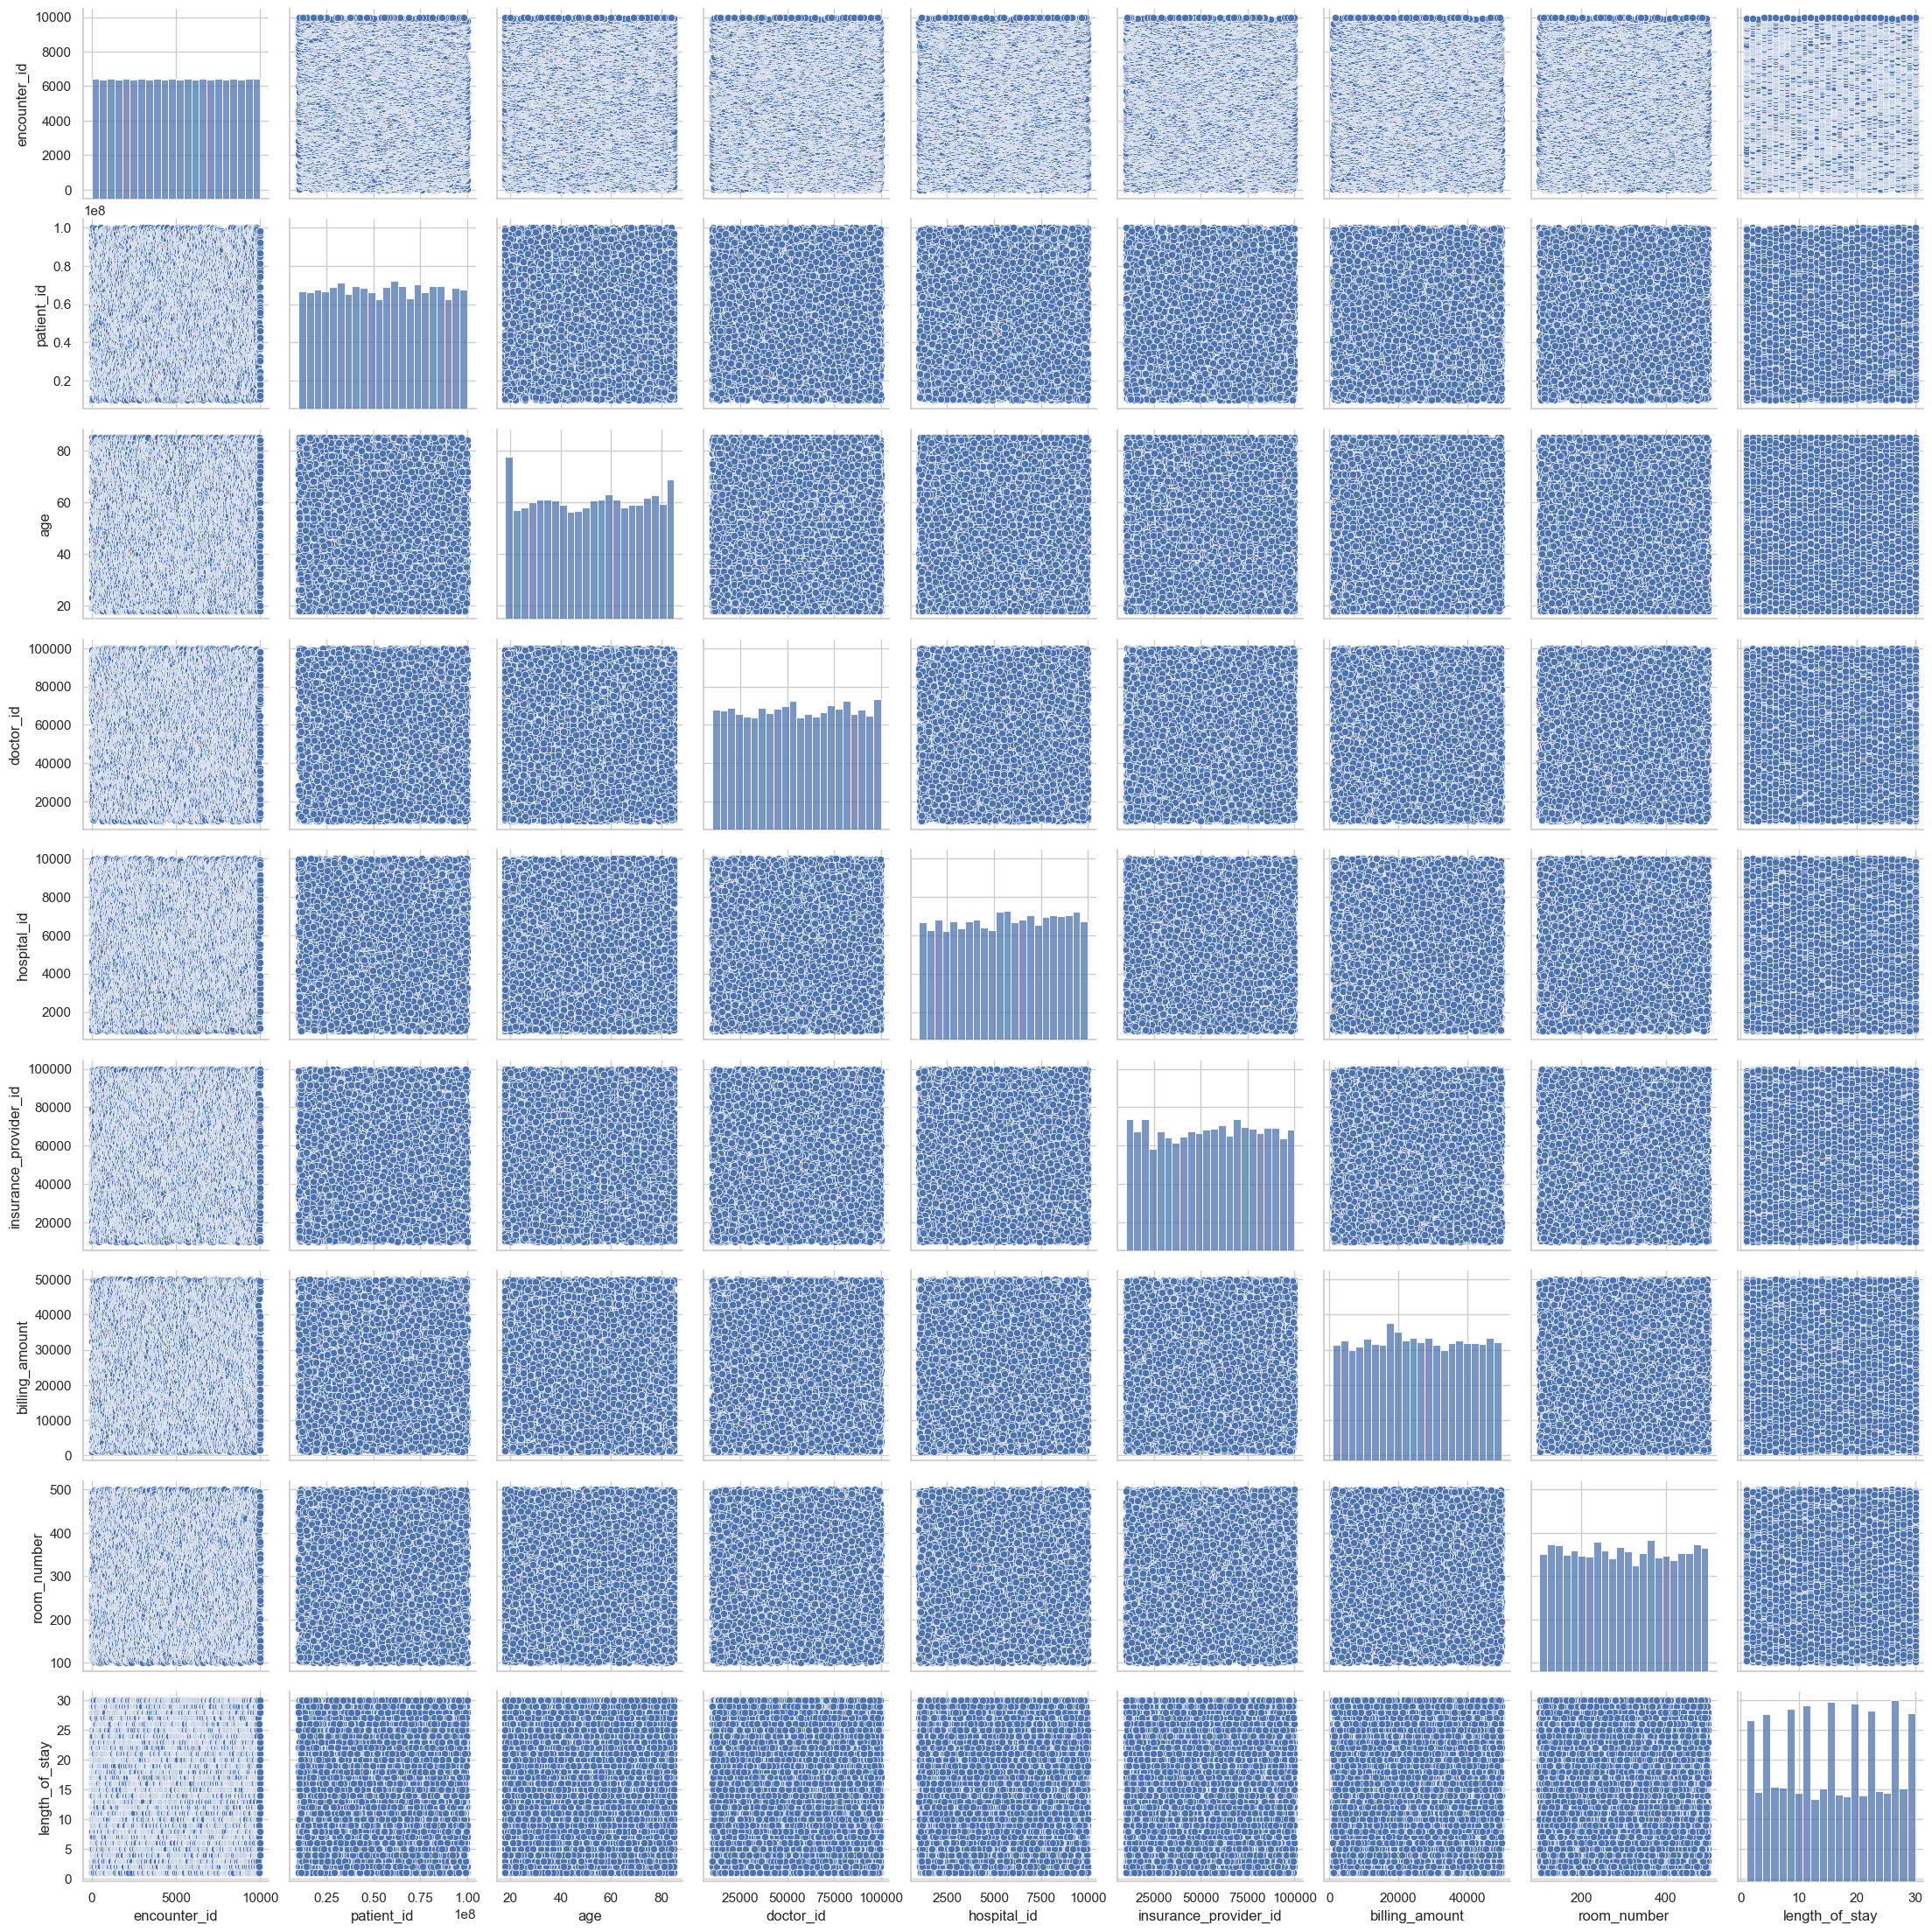

In [1065]:
sns.pairplot(df)

<Axes: xlabel='length_of_stay', ylabel='Density'>

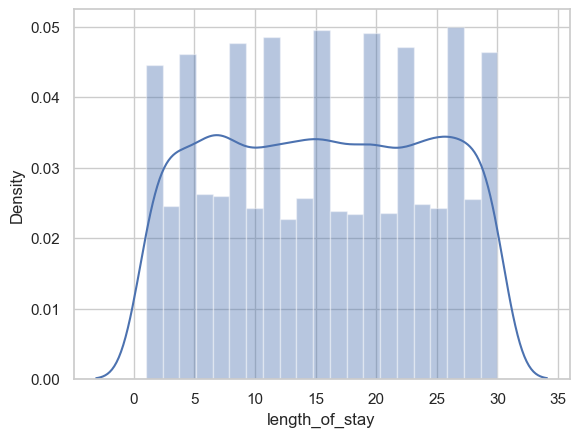

In [1066]:
sns.distplot(df['length_of_stay'])

# Data Cleaning:
***To print the number of missing (NaN) values in each column of the DataFrame***   
***Remove all duplicate rows.***  
***Treat the null values in all columns using any measures (removing/ replace the values with mean/median/mode)***  
***Check the skewness***  
***Find the outliers.***   

In [1068]:
#to print the number of missing (NaN) values in each column of the DataFrame
print(df.isnull().sum())

encounter_id             0
patient_id               0
name                     0
age                      0
gender                   0
blood_type               0
medical_condition        0
doctor_id                0
doctor                   0
hospital_id              0
hospital                 0
insurance_provider_id    0
insurance_provider       0
billing_amount           0
room_number              0
admission_type           0
date_of_admission        0
discharge_date           0
medication               0
test_results             0
length_of_stay           0
stay_group               0
dtype: int64


***To print the duplicate record count and print the duplicate records***

In [1070]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

duplicates = df[df.duplicated()]
print(duplicates)


Number of duplicate rows: 0
Empty DataFrame
Columns: [encounter_id, patient_id, name, age, gender, blood_type, medical_condition, doctor_id, doctor, hospital_id, hospital, insurance_provider_id, insurance_provider, billing_amount, room_number, admission_type, date_of_admission, discharge_date, medication, test_results, length_of_stay, stay_group]
Index: []


In [1071]:
print(df.dtypes)


encounter_id                int64
patient_id                  int64
name                       object
age                         int64
gender                     object
blood_type                 object
medical_condition          object
doctor_id                   int64
doctor                     object
hospital_id                 int64
hospital                   object
insurance_provider_id       int64
insurance_provider         object
billing_amount            float64
room_number                 int64
admission_type             object
date_of_admission          object
discharge_date             object
medication                 object
test_results               object
length_of_stay              int64
stay_group               category
dtype: object


***print the skewness of the numerical columns***

In [1073]:
# columns_to_exclude = ['length_of_stay','test_results','medication','discharge_date','date_of_admission',
#                       'admission_type','insurance_provider','hospital','doctor','medical_condition','blood_type','gender',
#                      'name']
# skewness = df.drop(columns=columns_to_exclude, errors='ignore').skew()
# print(skewness)

skewness = df.select_dtypes(include=['number']).skew()
print(skewness)



encounter_id             0.000000
patient_id               0.002310
age                     -0.012148
doctor_id               -0.010543
hospital_id             -0.038115
insurance_provider_id   -0.029465
billing_amount           0.012721
room_number              0.013370
length_of_stay          -0.002663
dtype: float64


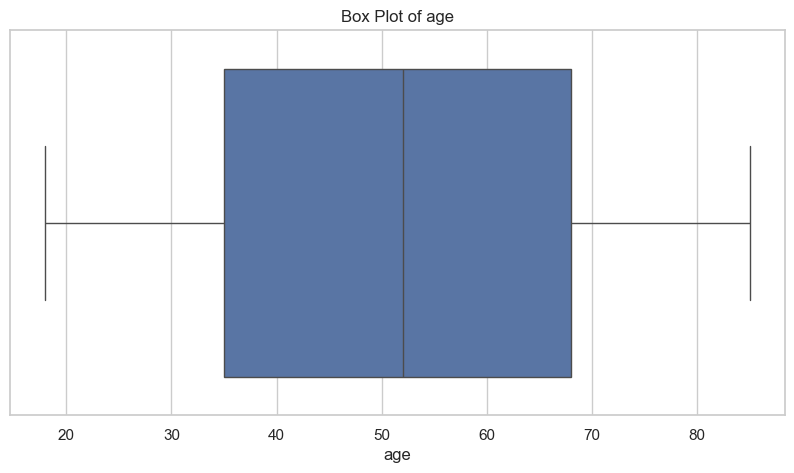

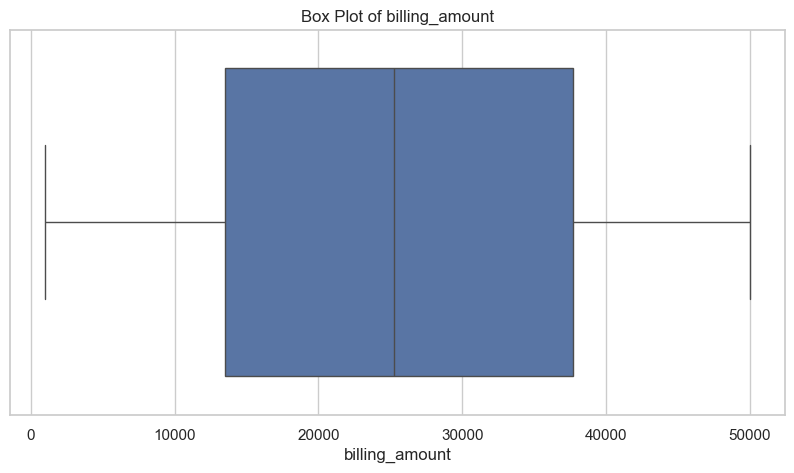

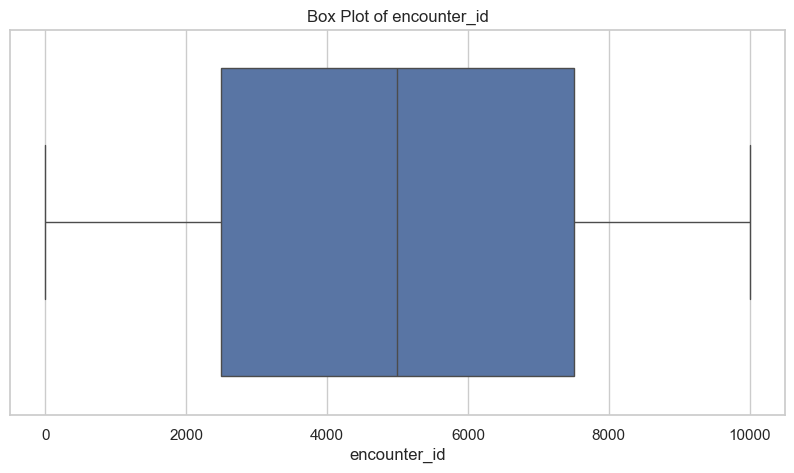

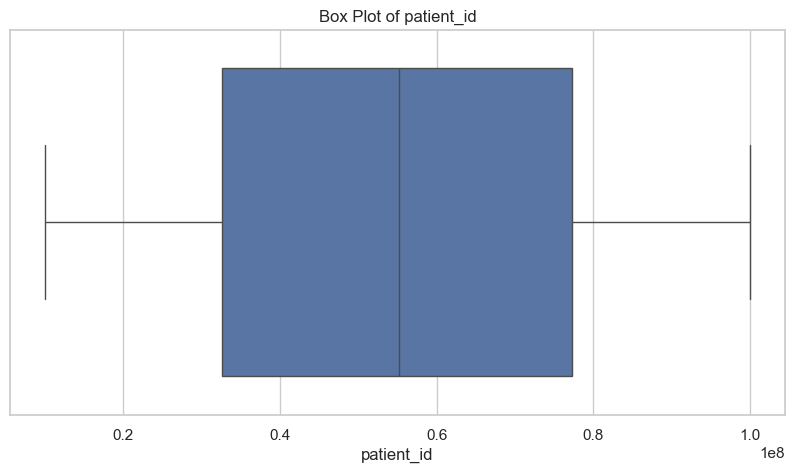

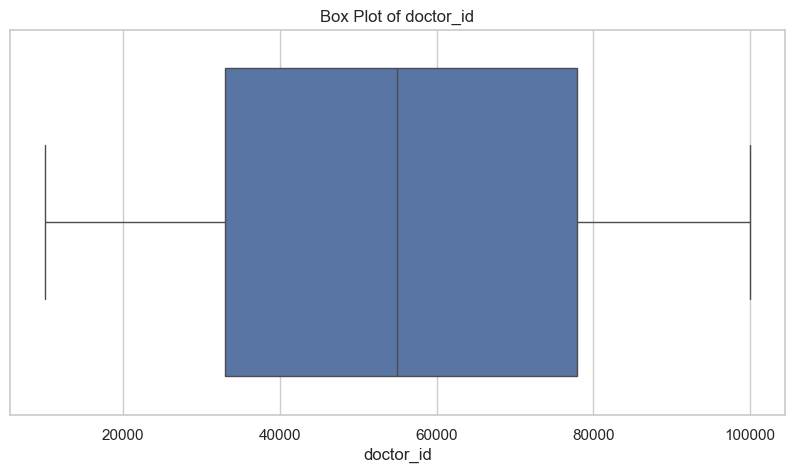

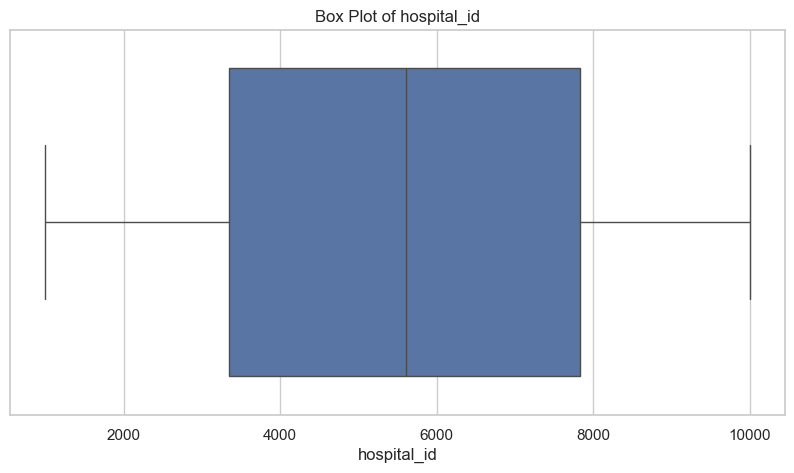

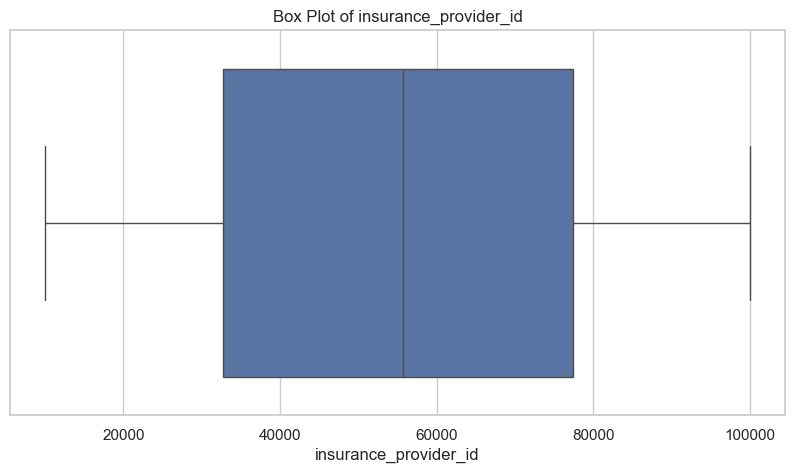

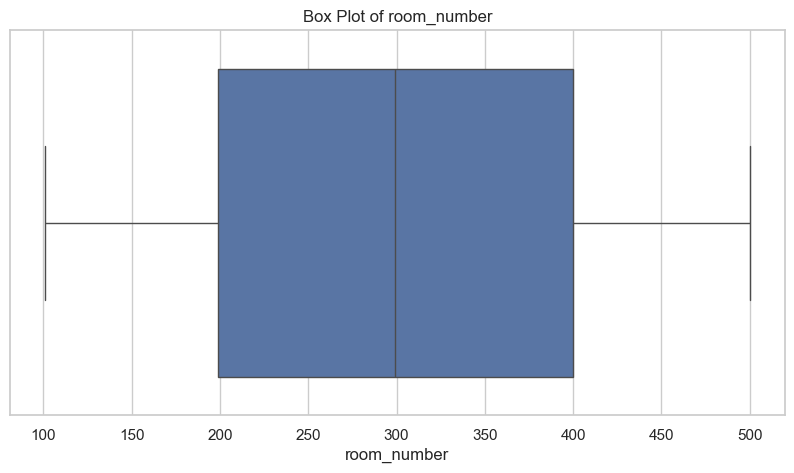

In [1074]:
# Box plots to identify outliers
num_cols =['age', 'billing_amount','encounter_id','patient_id','doctor_id','hospital_id', 'insurance_provider_id','room_number', ]  
for col in num_cols:
#for col in skewness:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


***Histogram plot for the continuous numerical data***

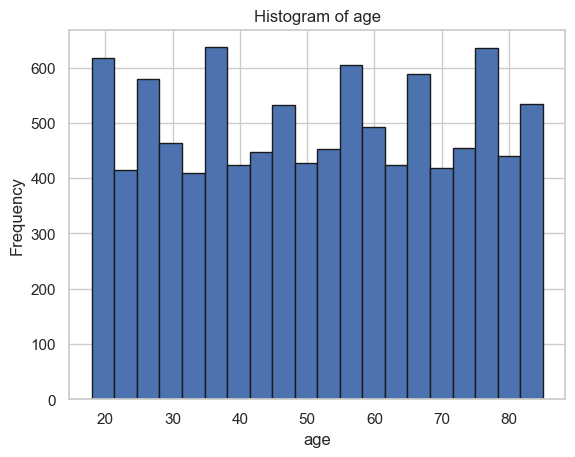

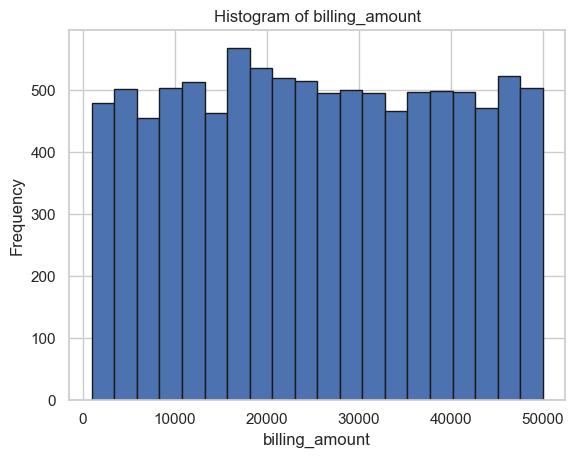

In [1076]:

#Histogram plot
columns_to_plot = ['age', 'billing_amount', ]  
for col in columns_to_plot:
    plt.figure()
    df[col].hist(bins=20, edgecolor='k')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


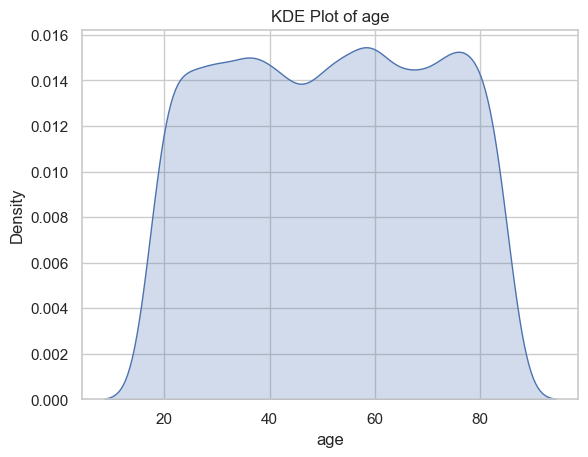

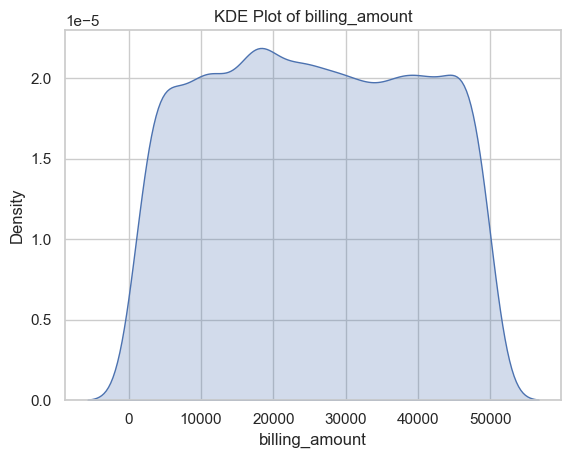

In [1077]:

# columns_to_plot = ['encounter_id','patient_id','age','doctor_id','hospital_id', 'billing_amount', 'hospital_id']  
columns_to_plot = ['age', 'billing_amount', ]  
for col in columns_to_plot:
    plt.figure()
    sns.kdeplot(df[col], shade=True)
    plt.title(f"KDE Plot of {col}")


Bivariate analysis

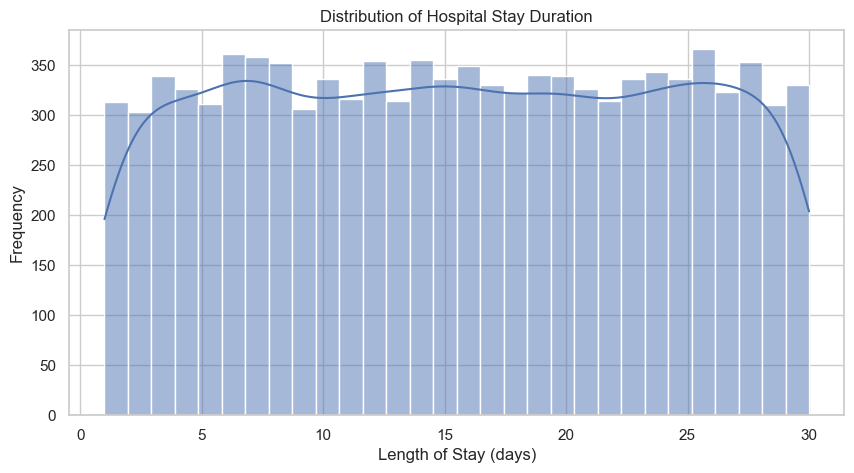

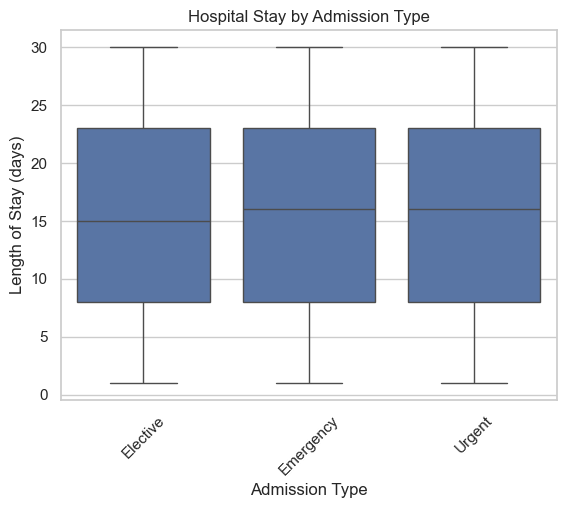

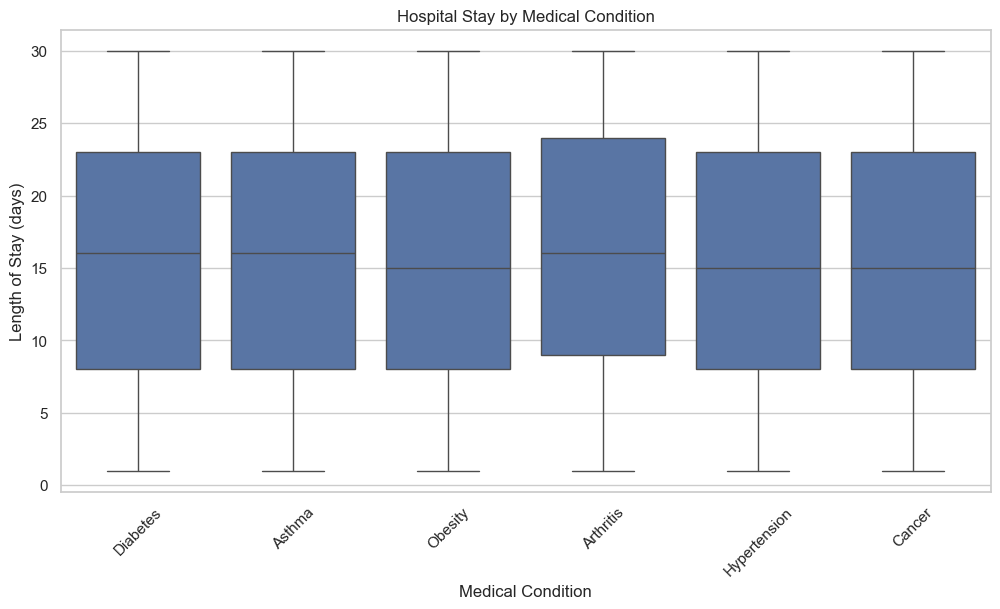

In [1079]:

plt.figure(figsize=(10,5))
sns.histplot(df['length_of_stay'], bins=30, kde=True)
plt.xlabel("Length of Stay (days)")
plt.ylabel("Frequency")
plt.title("Distribution of Hospital Stay Duration")
plt.show()


# This will help identify if hospital stays are skewed, normally distributed, or have outliers.
# 2. Trends Based on Admission Type
# Check how different admission types impact hospital stay:
# plt.figure(figsize=(12,6))
sns.boxplot(x='admission_type', y='length_of_stay', data=df)
plt.xlabel("Admission Type")
plt.ylabel("Length of Stay (days)")
plt.title("Hospital Stay by Admission Type")
plt.xticks(rotation=45)
plt.show()


# This could reveal which types of admissions (e.g., emergency vs. scheduled) lead to longer hospital stays.
# 3. Impact of Medical Conditions
# Investigate if certain medical conditions result in prolonged hospital stays:
top_conditions = df['medical_condition'].value_counts().index[:10]  # Select top conditions
subset = df[df['medical_condition'].isin(top_conditions)]  # Filter data

plt.figure(figsize=(12,6))
sns.boxplot(x='medical_condition', y='length_of_stay', data=subset)
plt.xlabel("Medical Condition")
plt.ylabel("Length of Stay (days)")
plt.title("Hospital Stay by Medical Condition")
plt.xticks(rotation=45)
plt.show()


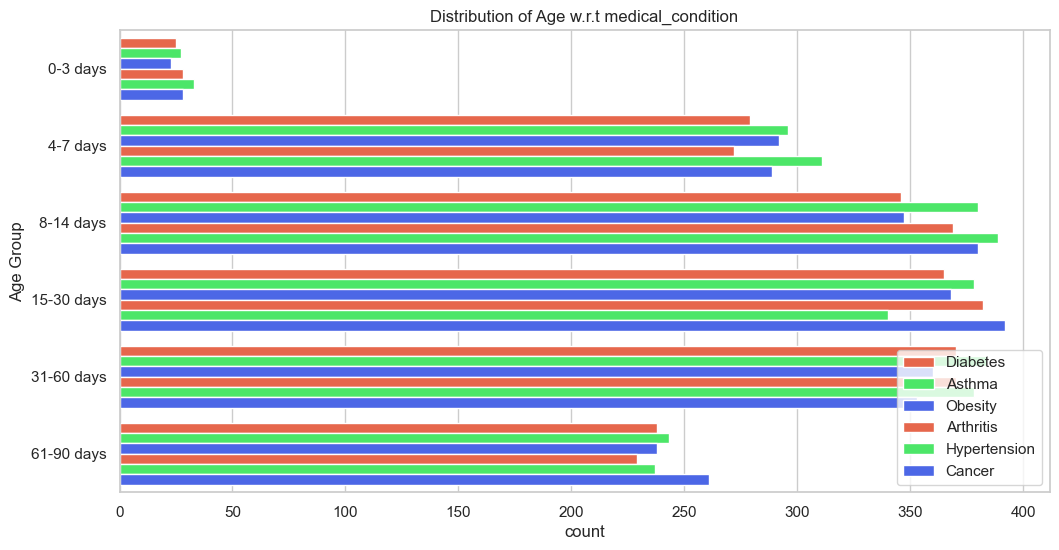

In [1080]:
fig,ax = plt.subplots(figsize=(12,6))
bins = [0, 18, 30, 45, 60, 75, 100]  # Adjust as needed
# labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-100']
# sns.countplot(x=df['medical_condition'], hue=df['blood_type'])
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
sns.countplot(y=df['age_group'],hue=df['medical_condition'], palette=['#FF5733', '#33FF57', '#3357FF'])
# plt.title("Insurance Coverage Across Different Age Groups")
plt.title("Distribution of Age w.r.t medical_condition")
plt.ylabel("Age Group")
plt.legend(loc='lower right')
plt.show()

***from above plot, we can infer that Cancer, Hypertension and diabetes are the highest medical condition across the age***


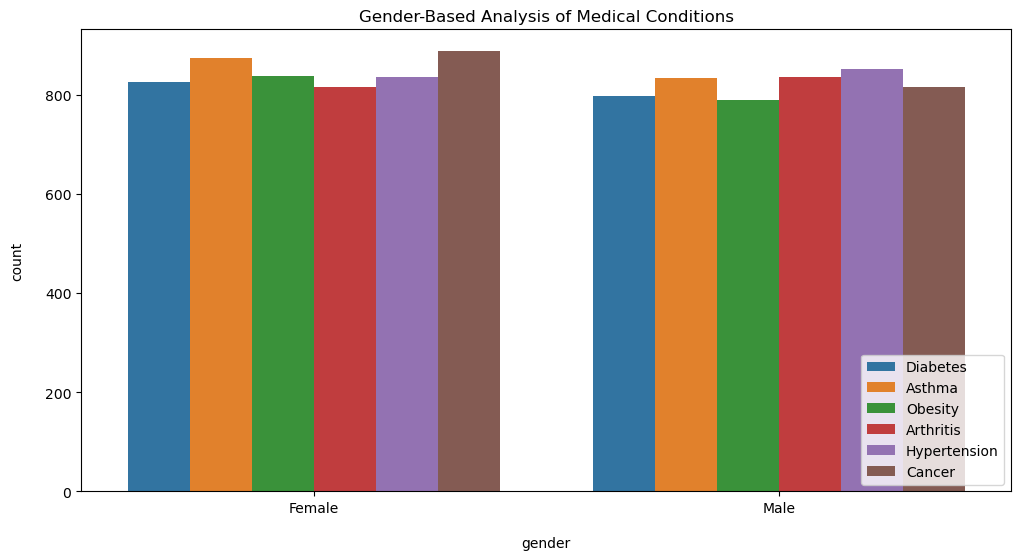

In [101]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(data=df,x='gender',hue=df['medical_condition'])
plt.xlabel("gender",labelpad=15.0)
plt.ylabel("count",labelpad=15.0)
plt.title("Gender-Based Analysis of Medical Conditions")
plt.legend(loc='lower right')
plt.show()

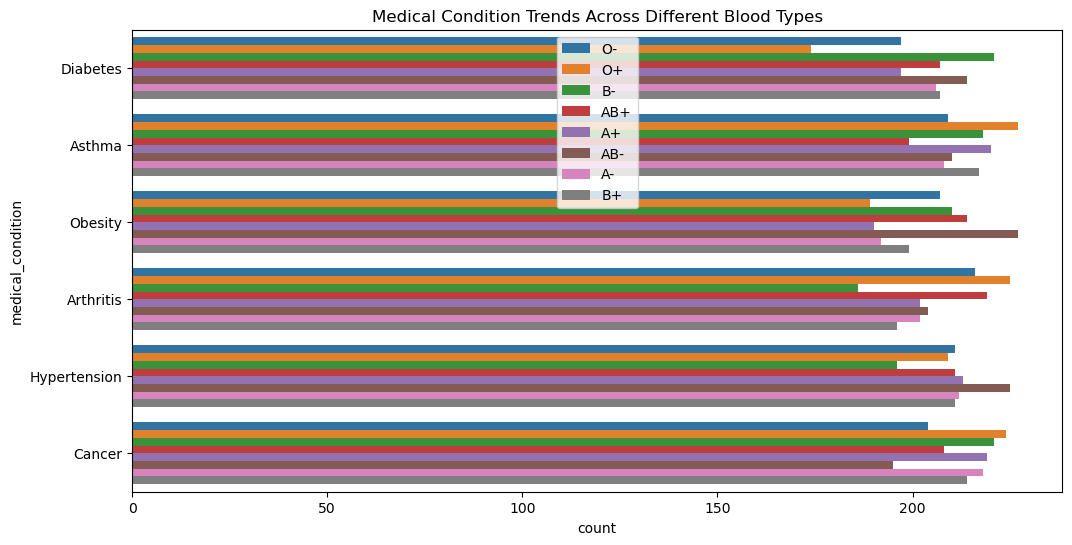

In [87]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(y=df['medical_condition'],hue=df['blood_type'])
plt.title("Medical Condition Trends Across Different Blood Types")
plt.legend(loc='upper center')
plt.show()

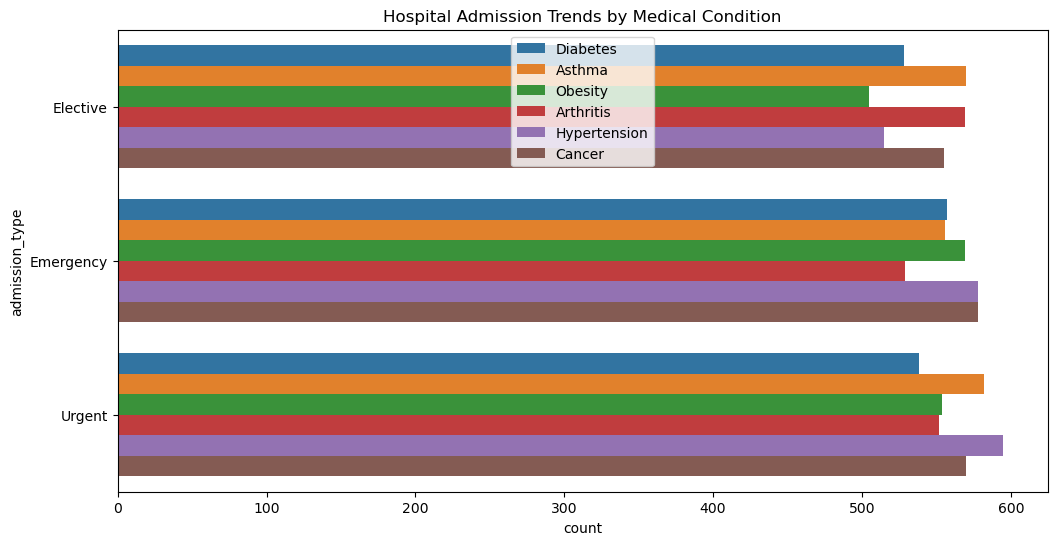

In [89]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(y=df['admission_type'],hue=df['medical_condition'])
plt.title("Hospital Admission Trends by Medical Condition")
plt.legend(loc='upper center')
plt.show()

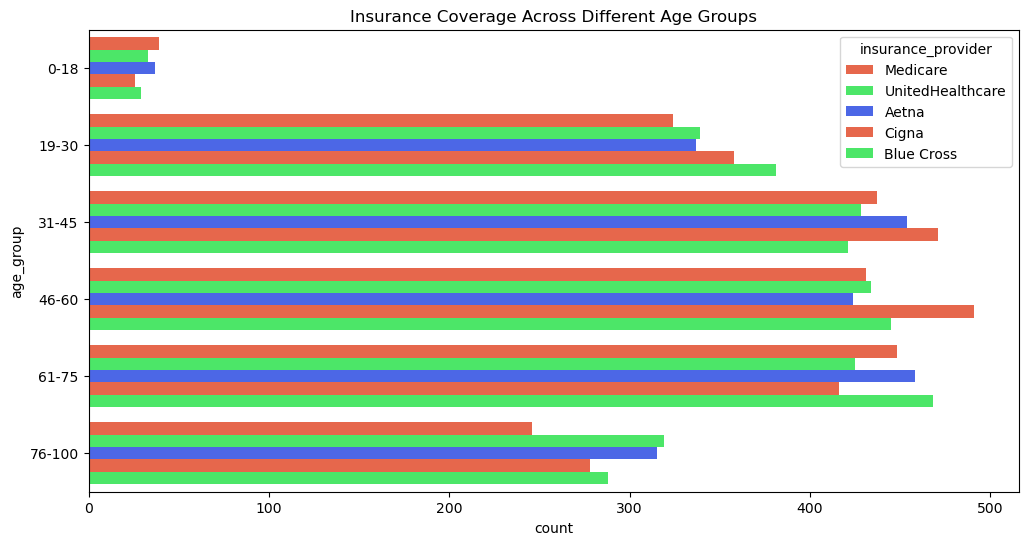

In [73]:
fig,ax = plt.subplots(figsize=(12,6))
bins = [0, 18, 30, 45, 60, 75, 100]  # Adjust as needed
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
sns.countplot(y=df['age_group'],hue=df['insurance_provider'], palette=['#FF5733', '#33FF57', '#3357FF'])
plt.title("Insurance Coverage Across Different Age Groups")
plt.show()

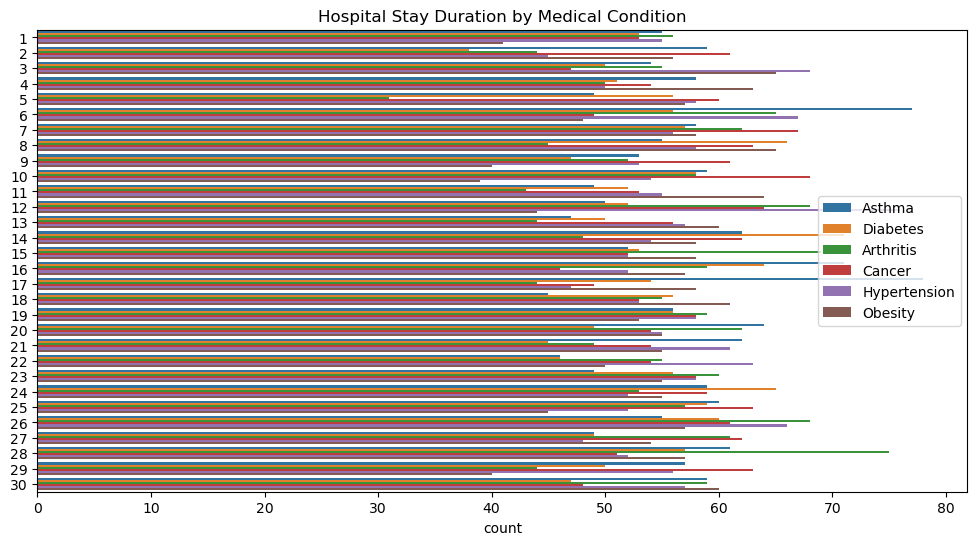

In [69]:
fig,ax = plt.subplots(figsize=(12,6))
# plt.figure(figsize=(4,8))
sns.countplot(y=df['length_of_stay'],hue=df['medical_condition'])
plt.ylabel("")
plt.legend(loc='center right')
plt.title("Hospital Stay Duration by Medical Condition")
plt.show()

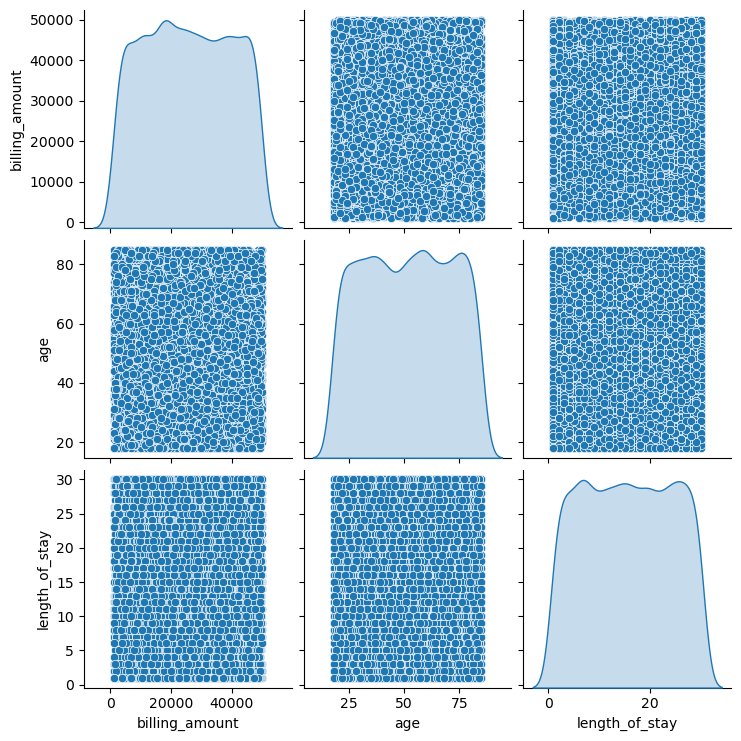

In [230]:

selected_cols = ['billing_amount', 'age',  'length_of_stay']
sns.pairplot(df[selected_cols], diag_kind='kde')#hue='origin')

plt.show()


***columns like enounter_id,patient_id,doctor_id,hospital_id,room_number are numeric with categorical values, they can be excluded from statistical analyses like skewness because,these are identifiers rather than measured values.***

***In the dataset the remaining numerical columns are age,billing_amount and length_of_stay. length_of_stay also has to be excluded from statistical analyses since it is the target column.***

In [118]:
display(df)

encounter_id  patient_id                  name  age  gender blood_type  \
0                1    48559735       Tiffany Ramirez   81  Female         O-   
1                2    68988993           Ruben Burns   35    Male         O+   
2                3    57429465             Chad Byrd   61    Male         B-   
3                4    44487379     Antonio Frederick   49    Male         B-   
4                5    57789449   Mrs. Brandy Flowers   51    Male         O-   
...            ...         ...                   ...  ...     ...        ...   
9995          9996    92106285            James Hood   83    Male         A+   
9996          9997    37699698       Stephanie Evans   47  Female        AB+   
9997          9998    69001727  Christopher Martinez   54    Male         B-   
9998          9999    55907201           Amanda Duke   84    Male         A+   
9999         10000    12309123             Eric King   20    Male         B-   

     medical_condition  doctor_id             doctor  hospital_id  \
0             Diabetes      24379     Patrick Parker         8130   
1               Asthma      54845      Diane Jackson         7856   
2              Obesity      88087         Paul Baker         4494   
3               Asthma      22426     Brian Chandler         8117   
4            Arthritis      84765     Dustin Griffin         7259   
...                ...        ...                ...          ...   
9995           Obesity      29623       Samuel Moody         3914   
9996         Arthritis      21531  Christopher Yates         2035   
9997         Arthritis      86553   Robert Nicholson         6375   
9998         Arthritis      85611        Jamie Lewis         8854   
9999         Arthritis      89049        Tasha Avila         6731   

                       hospital  insurance_provider_id insurance_provider  \
0              Wallace-Hamilton                  17536           Medicare   
1     Burke, Griffin and Cooper                  97562   UnitedHealthcare   
2                    Walton LLC                  36710           Medicare   
3                    Garcia Ltd                  70210           Medicare   
4       Jones, Brown and Murray                  92038   UnitedHealthcare   
...                         ...                    ...                ...   
9995   Wood, Martin and Simmons                  11695   UnitedHealthcare   
9996               Nash-Krueger                  24850         Blue Cross   
9997            Larson and Sons                  10614         Blue Cross   
9998               Wilson-Lyons                  51516   UnitedHealthcare   
9999  Torres, Young and Stewart                  67783              Aetna   

      billing_amount  room_number admission_type date_of_admission  \
0       37490.983364          146       Elective        2022-11-17   
1       47304.064845          404      Emergency        2023-06-01   
2       36874.896997          292      Emergency        2019-01-09   
3       23303.322092          480         Urgent        2020-05-02   
4       18086.344184          477         Urgent        2021-07-09   
...              ...          ...            ...               ...   
9995    39606.840083          110       Elective        2022-07-29   
9996     5995.717488          244      Emergency        2022-01-06   
9997    49559.202905          312       Elective        2022-07-01   
9998    25236.344761          420         Urgent        2020-02-06   
9999    37223.965865          290      Emergency        2023-03-22   

     discharge_date   medication  test_results  length_of_stay  
0        2022-12-01      Aspirin  Inconclusive              14  
1        2023-06-15      Lipitor        Normal              14  
2        2019-02-08      Lipitor        Normal              30  
3        2020-05-03   Penicillin      Abnormal               1  
4        2021-08-02  Paracetamol        Normal              24  
...             ...          ...           ...             .

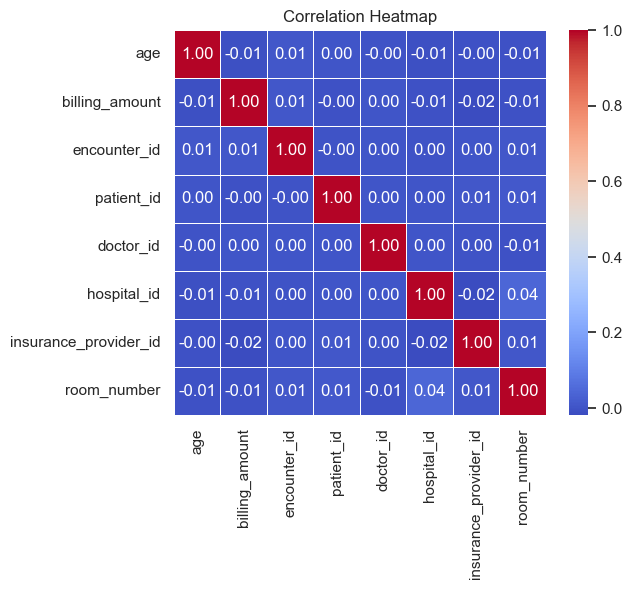

In [688]:
# Compute the correlation matrix
# Select relevant columns
columns_to_plot = ['age', 'billing_amount','encounter_id','patient_id','doctor_id','hospital_id', 'insurance_provider_id','room_number']
corr_matrix = df[columns_to_plot].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [1081]:
categorical_columns = ['name', 'gender', 'blood_type', 'medical_condition', 'doctor', 'hospital', 'insurance_provider', 'admission_type',
                       'date_of_admission', 'discharge_date', 'medication', 'test_results']

for col in categorical_columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("\n")



Value counts for column: name
name
Michael Johnson        7
James Johnson          6
Michael Miller         4
Michelle Williams      4
Scott Smith            4
                      ..
Sharon Rose            1
Stephanie Knox         1
Anthony Jones          1
Melissa Perkins DVM    1
Eric King              1
Name: count, Length: 9378, dtype: int64


Value counts for column: gender
gender
Female    5075
Male      4925
Name: count, dtype: int64


Value counts for column: blood_type
blood_type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64


Value counts for column: medical_condition
medical_condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


Value counts for column: doctor
doctor
Michael Johnson      7
Robert Brown         5
Michelle Anderson    5
Matthew Smith        5
Jennifer Smith       5
           


# ***<span style="color: red;">Feature Engineering</span>***


# ***Encoding :***
***Machine learning algorithms work with numerical data, and categorical or string data needs to be transformed into numbers. Encoding refers to the process of converting data into a numerical format.***

***There are several categorical columns in our dataset. However we have to follow different encoding approach to the each of them depending upon the characteristic of the feature column. There  are some column which are irrevalant for our processing.***  


***Name             : It can be droped since it is only and identifier and it has not much role in predective analysis.***  

***<span style="color: blue;">gender </span> : There is only two categories,Maler or female .<span style="color: blue;">Label encOding </span>  best suited for this since it does not create any false hierarchies.***  

***<span style="color: Green;">blood_type </span>blood_type       : There are basically four blood types (A,B,AB,O) and these are nominal values with no inherent order.<span style="color: Green;">one hot encoding </span> is much suitable***  

**<span style="color: Green;">medical_condition </span>:With less than 10 unique conditions, one-hot encoding creates a manageable number of new binary columns, such as , , , etc. <span style="color: Green;">One-Hot Encoding </span>  can  account for relationship between condition and length_of_ stay***  

***<span style="color: brown;">doctor </span>           : Act as identifier but it has high cardinality . <span style="color: brown;">frequency encoding </span>  is apted for this feaure***   
***<span style="color: brown;">hospital </span>          : Similar to doctor, serve as an identifier without nominal significance.However due to high cardinality <Span style="color: brown;">frequency encoding</span>  is suited for this***  
***<span style="color: Green;">admission_type </span>   : Admission types are nominal categories hence <span style="color: Green;">one hot encoding </span> is most apted***

***<span style="color: Green;">medication </span>        : Nominal data with diverse categories <span style="color: green;">One-hot encoding </span> is suitable***  
***<span style="color: Green;">test_result </span>       : <span style="color: Green;">One-hot encoding  </span>is suitable for this feature***  


In [1083]:
# Display the first two rows for all columns
display(df.head(2))
print(df.columns.to_list())
print("\nFirst Two Rows of Each Column:")
display(df.head(2))  

encounter_id  patient_id             name  age  gender blood_type  \
0             1    48559735  Tiffany Ramirez   81  Female         O-   
1             2    68988993      Ruben Burns   35    Male         O+   

  medical_condition  doctor_id          doctor  hospital_id  \
0          Diabetes      24379  Patrick Parker         8130   
1            Asthma      54845   Diane Jackson         7856   

                    hospital  insurance_provider_id insurance_provider  \
0           Wallace-Hamilton                  17536           Medicare   
1  Burke, Griffin and Cooper                  97562   UnitedHealthcare   

   billing_amount  room_number admission_type date_of_admission  \
0    37490.983364          146       Elective        2022-11-17   
1    47304.064845          404      Emergency        2023-06-01   

  discharge_date medication  test_results  length_of_stay stay_group  \
0     2022-12-01    Aspirin  Inconclusive              14  8-14 days   
1     2023-06-15    Lipitor        Normal              14  8-14 days   

    age_group  
0  61-90 days  
1   8-14 days

['encounter_id', 'patient_id', 'name', 'age', 'gender', 'blood_type', 'medical_condition', 'doctor_id', 'doctor', 'hospital_id', 'hospital', 'insurance_provider_id', 'insurance_provider', 'billing_amount', 'room_number', 'admission_type', 'date_of_admission', 'discharge_date', 'medication', 'test_results', 'length_of_stay', 'stay_group', 'age_group']

First Two Rows of Each Column:


encounter_id  patient_id             name  age  gender blood_type  \
0             1    48559735  Tiffany Ramirez   81  Female         O-   
1             2    68988993      Ruben Burns   35    Male         O+   

  medical_condition  doctor_id          doctor  hospital_id  \
0          Diabetes      24379  Patrick Parker         8130   
1            Asthma      54845   Diane Jackson         7856   

                    hospital  insurance_provider_id insurance_provider  \
0           Wallace-Hamilton                  17536           Medicare   
1  Burke, Griffin and Cooper                  97562   UnitedHealthcare   

   billing_amount  room_number admission_type date_of_admission  \
0    37490.983364          146       Elective        2022-11-17   
1    47304.064845          404      Emergency        2023-06-01   

  discharge_date medication  test_results  length_of_stay stay_group  \
0     2022-12-01    Aspirin  Inconclusive              14  8-14 days   
1     2023-06-15    Lipitor        Normal              14  8-14 days   

    age_group  
0  61-90 days  
1   8-14 days

***Label encoding***

In [1118]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
df = pd.DataFrame(df)
# Columns to label encode
label_columns = ['gender','blood_type', 'medical_condition', 'insurance_provider', 
                   'admission_type', 'medication', 'test_results','doctor','hospital']

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Apply label encoding for each column in place
for column in label_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the result
display(df.head(2))


encounter_id  patient_id             name  age  gender  blood_type  \
0             1    48559735  Tiffany Ramirez   81       0           7   
1             2    68988993      Ruben Burns   35       1           6   

   medical_condition  doctor_id  doctor  hospital_id  hospital  \
0                  3      24379    7167         8130      7960   
1                  1      54845    2597         7856       978   

   insurance_provider_id  insurance_provider  billing_amount  room_number  \
0                  17536                   3    37490.983364          146   
1                  97562                   4    47304.064845          404   

   admission_type date_of_admission discharge_date  medication  test_results  \
0               0        2022-11-17     2022-12-01           0             1   
1               1        2023-06-01     2023-06-15           2             2   

   length_of_stay stay_group   age_group  
0              14  8-14 days  61-90 days  
1              14  8-14 days   8-14 days

In [1121]:
# to show the entire column while printing
pd.set_option('display.max_columns', None)
display(df.head(2))


encounter_id  patient_id             name  age  gender  blood_type  \
0             1    48559735  Tiffany Ramirez   81       0           7   
1             2    68988993      Ruben Burns   35       1           6   

   medical_condition  doctor_id  doctor  hospital_id  hospital  \
0                  3      24379    7167         8130      7960   
1                  1      54845    2597         7856       978   

   insurance_provider_id  insurance_provider  billing_amount  room_number  \
0                  17536                   3    37490.983364          146   
1                  97562                   4    47304.064845          404   

   admission_type date_of_admission discharge_date  medication  test_results  \
0               0        2022-11-17     2022-12-01           0             1   
1               1        2023-06-01     2023-06-15           2             2   

   length_of_stay stay_group   age_group  
0              14  8-14 days  61-90 days  
1              14  8-14 days   8-14 days

In [1123]:
# print(labeld) columns
print(', '.join(df.columns))


encounter_id, patient_id, name, age, gender, blood_type, medical_condition, doctor_id, doctor, hospital_id, hospital, insurance_provider_id, insurance_provider, billing_amount, room_number, admission_type, date_of_admission, discharge_date, medication, test_results, length_of_stay, stay_group, age_group


***Save the copy of the encoded file***

In [1126]:
df.to_csv("df_encoded.csv", index=False)


In [1128]:
print(df.select_dtypes(include=['object']).head())


                  name date_of_admission discharge_date
0      Tiffany Ramirez        2022-11-17     2022-12-01
1          Ruben Burns        2023-06-01     2023-06-15
2            Chad Byrd        2019-01-09     2019-02-08
3    Antonio Frederick        2020-05-02     2020-05-03
4  Mrs. Brandy Flowers        2021-07-09     2021-08-02


***Feature scaling is a preprocessing technique that transforms feature values to a similar scale, ensuring all features contribute equally to the model***

***Separate Numerical and Categorical Features***

In [1132]:
# categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
# numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# X_categorical = df[categorical_cols]
# X_numerical = df[numerical_cols]
# y = df['length_of_stay']
# print("Categorical_columns:{X_categorical})
# print(X_numerical)
df = pd.read_csv("df_encoded.csv")

cat_cols = df.select_dtypes(include=['object', 'bool']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

X_categorical = df[cat_cols]
X_numerical = df[num_cols]
y = df['length_of_stay']

print(f"Categorical Columns: {X_categorical.columns}")  # Corrected print statement
print(f"Numerical Columns: {X_numerical.columns}")
# print(X_numerical)
    

Categorical Columns: Index(['name', 'date_of_admission', 'discharge_date', 'stay_group',
       'age_group'],
      dtype='object')
Numerical Columns: Index(['encounter_id', 'patient_id', 'age', 'gender', 'blood_type',
       'medical_condition', 'doctor_id', 'doctor', 'hospital_id', 'hospital',
       'insurance_provider_id', 'insurance_provider', 'billing_amount',
       'room_number', 'admission_type', 'medication', 'test_results',
       'length_of_stay'],
      dtype='object')


In [56]:
# calculate correlation mmatrix
correlation_matrix=X_numerical.corr()
correlation_matrix

encounter_id  patient_id       age    gender  \
encounter_id               1.000000   -0.001833  0.006686 -0.006570   
patient_id                -0.001833    1.000000  0.002572  0.010259   
age                        0.006686    0.002572  1.000000 -0.008099   
gender                    -0.006570    0.010259 -0.008099  1.000000   
blood_type                 0.003219    0.000735 -0.006807  0.012607   
medical_condition         -0.001642   -0.000315 -0.003616 -0.003872   
doctor_id                  0.001644    0.000877 -0.002856 -0.004695   
doctor                    -0.003244    0.010215  0.016265  0.017136   
hospital_id                0.000296    0.004420 -0.008444 -0.002020   
hospital                   0.000882    0.003019 -0.007291 -0.000941   
insurance_provider_id      0.002299    0.007665 -0.004898 -0.003593   
insurance_provider         0.020086    0.010412 -0.000138 -0.020669   
billing_amount             0.005015   -0.004353 -0.009483  0.002340   
room_number                0.005464    0.010082 -0.005371  0.002864   
admission_type            -0.006270   -0.004731  0.003233 -0.004515   
medication                -0.003963   -0.004869  0.010242  0.007129   
test_results               0.003753    0.002102  0.008747 -0.010472   
length_of_stay            -0.003801   -0.006443  0.009111 -0.006361   

                       blood_type  medical_condition  doctor_id    doctor  \
encounter_id             0.003219          -0.001642   0.001644 -0.003244   
patient_id               0.000735          -0.000315   0.000877  0.010215   
age                     -0.006807          -0.003616  -0.002856  0.016265   
gender                   0.012607          -0.003872  -0.004695  0.017136   
blood_type               1.000000          -0.005318  -0.000415  0.005417   
medical_condition       -0.005318           1.000000   0.000208  0.011276   
doctor_id               -0.000415           0.000208   1.000000  0.002994   
doctor                   0.005417           0.011276   0.002994  1.000000   
hospital_id              0.006223          -0.011906   0.003219  0.014343   
hospital                 0.012167           0.004974   0.008806  0.022142   
insurance_provider_id    0.010500           0.011120   0.000637  0.002113   
insurance_provider       0.025533           0.007111  -0.003432 -0.022885   
billing_amount          -0.002524           0.008602   0.002636 -0.013330   
room_number              0.000811          -0.008479  -0.006622  0.002463   
admission_type          -0.005247           0.019222  -0.002146  0.005842   
medication              -0.002690          -0.003538   0.007845 -0.001012   
test_results            -0.003698           0.001659  -0.018729  0.003527   
length_of_stay           0.005942          -0.016266   0.007107 -0.020551   

                       hospital_id  hospital  insurance_provider_id  \
encounter_id              0.000296  0.000882               0.002299   
patient_id                0.004420  0.003019               0.007665   
age                      -0.008444 -0.007291              -0.004898   
gender                   -0.002020 -0.000941              -0.003593   
blood_type                0.006223  0.012167               0.010500   
medical_condition        -0.011906  0.004974               0.011120   
doctor_id                 0.003219  0.008806               0.000637   
doctor                    0.014343  0.022142               0.002113   
hospital_id               1.000000  0.006945              -0.016147   
hospital                  0.006945  1.000000              -0.004884   
insurance_provider_id    -0.016147 -0.004884               1.000000   
insurance_provider       -0.014911  0.015020               0.015353   
billing_amount           -0.005196  0.002607              -0.019234   
room_number               0.043124  0.012619               0.006503   
admission_type           -0.003866 -0.021674              -0.001591   
medication                0.016925  0.006021               0.010658   
te

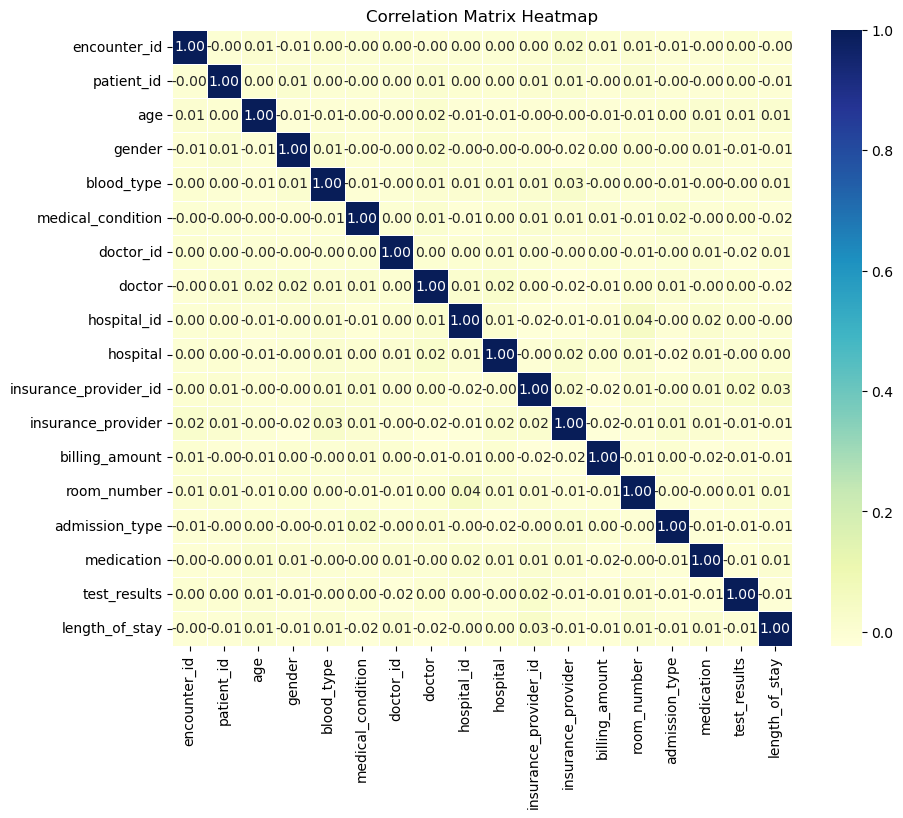

In [58]:
correlation_matrix = X_numerical.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


feature selection

kbest

In [1489]:
import numpy as np
df = pd.read_csv("df_encoded.csv")

# boston = load_boston()
X= df.drop(columns=['name','date_of_admission','discharge_date','length_of_stay','stay_group','age_group'])  # Features
y = df['length_of_stay']  # Target

select = SelectKBest(score_func=f_regression, k=10)
X_select= select.fit_transform(X, y)
# X_selected= select.fit_transform(X, y)
# Get selected feature names and scores
X_selected = X.columns[select.get_support()]
selected_scores = select.scores_[select.get_support()]
# Sort indices in descending order based on scores
sorted_indices = np.argsort(selected_scores)[::-1]
# sorted_features = selected_features[sorted_indices]
sorted_features = X_selected[sorted_indices]
sorted_scores = selected_scores[sorted_indices]
# Print the sorted results
print("Features in descending order based on scores:")
for feature, score in zip(sorted_features, sorted_scores):
    print(f"{feature}: {score}")


# print("Selected Features:\n", selected_features)
# print("Feature Scores based on select_k:\n", selected_scores)

# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import PowerTransformer

# # Apply Power Transformation
# power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
# X_selected = power_transformer.fit_transform(X)

# # Compute feature ranking (based on absolute mean values)
# feature_means = np.mean(np.abs(X_selected), axis=0)
# sorted_indices = np.argsort(feature_means)[::1]  # Descending order

# # Organize results
# sorted_features = X.columns[sorted_indices]
# sorted_means = feature_means[sorted_indices]

# # Display in a structured way
# sorted_df = pd.DataFrame({'Feature': sorted_features, 'Transformed Mean': sorted_means})
# print(sorted_df)


# # Using f_regression
# selector = SelectKBest(score_func=f_regression, k=5)
# selector.fit(X, y)
# print(selector)

# from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
# # Using mutual_info_regression
# selector = SelectKBest(score_func=mutual_info_regression, k=15)
# selector.fit(X, y)
# print(selector)




Features in descending order based on scores:
insurance_provider_id: 8.751840598916893
doctor: 4.2244476799353325
medical_condition: 2.646153420526529
billing_amount: 1.8242789961233883
room_number: 0.9234387265567785
age: 0.8300850287479223
medication: 0.8139428123306981
test_results: 0.6769001729488057
doctor_id: 0.5049925464774232
patient_id: 0.41509203660961397


In [244]:
# df = pd.read_csv("df_encoded.csv")
# df=df.drop(columns=['name','date_of_admission','discharge_date',])
# cat_cols = df.select_dtypes(include=['object', 'bool']).columns
# num_cols = df.select_dtypes(include=['int64', 'float64']).columns
# X_categorical = df[cat_cols]
# X_numerical = df[num_cols]
# # y = df['length_of_stay']
# X_categorical = df[cat_cols]
# X_numerical = df[num_cols]
# X_categorical = df.drop(columns=['name','date_of_admission','discharge_date'])
# x_numerical=df.drop(columns=['length_of_stay'])

# # Chi-Square Test for categorical columns
# chi_selector=SelectKBest(chi2,k=20)
# X_chi=chi_selector.fit_transform(X_categorical,y)
# chi_selected_features=X_categorical.columns[chi_selector.get_support()]

# # Anova for numerical columns
# f_selector=SelectKBest(f_classif,k=6)
# X_f=f_selector.fit_transform(X_numerical,y)
# f_selected_features=X_numerical.columns[f_selector.get_support()]

# print("chi_squared selected features:",chi_selected_features)
# print("ANNOVA selected features:",f_selected_features)


In [1579]:
# # Import necessary libraries
# from sklearn.feature_selection import SelectKBest, mutual_info_regression
# import matplotlib.pyplot as plt

# # Selecting the top 15 features using mutual_info_regression
# selector = SelectKBest(score_func=mutual_info_regression, k=2)
# selector.fit(X, y)

# # Get feature scores
# feature_scores = selector.scores_  # Get scores of all features
# feature_score_dict = dict(zip(X.columns, feature_scores))  # Map feature names to their scores
# sorted_features = sorted(feature_score_dict.items(), key=lambda x: x[1], reverse=True)  # Sort by score

# print("Feature Scores (Sorted by Importance):")
# for feature, score in sorted_features:
#     print(f"{feature}: {score:.4f}")

# # Get selected features
# selected_feature_indices = selector.get_support(indices=True)  # Get indices of selected features
# selected_features = X.columns[selected_feature_indices]  # Get actual column names
# print("Selected Features:", selected_features.tolist())

# # Visualizing Feature Importance
# features = [f[0] for f in sorted_features[:6]]
# scores = [f[1] for f in sorted_features[:6]]

# plt.figure(figsize=(12,6))
# plt.barh(features, scores, color='skyblue')
# plt.xlabel("Feature Importance Score")
# plt.ylabel("Features")
# plt.title("Top 15 Selected Features")
# plt.gca().invert_yaxis()  # Reverse order to display highest-ranking features on top
# plt.show()


In [1497]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# rfe = RFE(estimator=model, n_features_to_select=20)  # Select top 10 features
# X_rfe = rfe.fit_transform(X, y)
# selected_feature_indices = rfe.support_
# selected_features = X.columns[selected_feature_indices]  # Get actual feature names

# print("Selected Features:", selected_features.tolist())
# feature_ranking = dict(zip(X.columns, rfe.ranking_))
# sorted_features = sorted(feature_ranking.items(), key=lambda x: x[1])  # Sort by importance


In [1581]:
# # features = np.array(df.columns)  # Original feature names
# # print("Original number of features:", features.shape)
# # print("Selected number of features:", filter.shape)
# # X_selected 
# # sorted_features
# X=X_selected

***Spliting the data for Training & Test***

In [1583]:
# X_selected = df[list(chi_selected_features) + list(f_selected_features)]
# X_selected = df[list(chi_selected_features) + list(f_selected_features)].drop(columns=['length_of_stay'])
# y = df['length_of_stay']  # Target variable
# X=df
# # X= df[list(selected_features)]
# X=X_selected
# X_selected = df[list(chi_selected_features) + list(f_selected_features)].drop(columns=['length_of_stay'])

# X=df
# # X= df[list(selected_features)]
# y = df['length_of_stay']  # Target variable

X=df[X_selected]
# X= df.drop(columns=['name','date_of_admission','discharge_date','length_of_stay','stay_group','age_group'])  # Features
y = df['length_of_stay']  # Target


# y = df['length_of_stay']
# # X_selected = df[list(chi_selected_features) + list(f_selected_features)]
# # X_selected = df[list(chi_selected_features) + list(f_selected_features)].drop(columns=['length_of_stay'])
# # y = df['length_of_stay']  # Target variable


# # # # Ensure 'length_of_stay' is removed from feature selection
# # selected_features = list(chi_selected_features) + list(f_selected_features)

# # # # Remove target column if mistakenly included
# if 'length_of_stay' in selected_features:
# #     selected_features.remove('length_of_stay')

# # # Create the final feature set
# # X_selected = df[selected_features]
# # X = df

# # # X = df.drop(columns=["length_of_stay",'name','date_of_admission','discharge_date', 'hospital','doctor'])

# # # Define target variable
# # y = df['length_of_stay']




# # # Define features (X) and target (y)
# # X = df.drop(columns=['length_of_stay',])  # Drop target column and the column which has only catergorical value 
# # y = df['length_of_stay']  # Target column                                             #direct impact on target column)
# # X=X_selected
# # y = df['length_of_stay']

# Split data (80% training, 20% testing)
# # X_train_chi_selected_features, X_test_chi_selected_features, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Display dataset sizes

# print("Training Features Shape:", X_train.shape)
# # print("Testing Features Shape:", X_test.shape)
# # print("Training Labels Shape:", y_train.shape)
# # print("Testing Labels Shape:", y_test.shape)


# # print("\nX_train\n:")
# # X_train.head(2)

# # X_test.head(2)
# # y_train
# y_test.head(2)
# Split data (80% training, 20% testing)
# X_selected_train, X_selected_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Display dataset sizes

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


# # print("\nX_train\n:")
# # X_train.head(2)

# # display(X.head(3))

Training Features Shape: (8000, 10)
Testing Features Shape: (2000, 10)
Training Labels Shape: (8000,)
Testing Labels Shape: (2000,)


In [1585]:
X_train

patient_id  age  medical_condition  doctor_id  doctor  \
9254    81483070   19                  3      81720    8913   
1561    95139271   37                  4      52266    5101   
1670    79646353   22                  2      73185    7384   
6087    10863810   67                  4      70561    8985   
6669    48662412   38                  4      91555    9056   
...          ...  ...                ...        ...     ...   
5734    67006804   34                  2      14575    5017   
5191    86164052   74                  3      70977    5163   
5390    50251453   81                  4      22161    8902   
860     46168137   45                  1      66013    4862   
7270    73469094   75                  4      49219    4969   

      insurance_provider_id  billing_amount  room_number  medication  \
9254                  53028    20629.373432          218           2   
1561                  28826    46635.084208          250           2   
1670                  68946     3361.701810          142           3   
6087                  78978    39014.160066          283           0   
6669                  21205    48390.969134          491           4   
...                     ...             ...          ...         ...   
5734                  34058    37299.716825          255           0   
5191                  32450    44866.916639          101           3   
5390                  46774    38851.273553          134           0   
860                   71813    43128.452163          495           0   
7270                  83797     1614.535069          387           1   

      test_results  
9254             0  
1561             1  
1670             2  
6087             0  
6669             2  
...            ...  
5734             1  
5191             0  
5390             1  
860              2  
7270             2  

[8000 rows x 10 columns]

In [1587]:
X_test

patient_id  age  medical_condition  doctor_id  doctor  \
6252    38409859   26                  0      77629    2263   
4684    62241933   80                  5      55562    5228   
1731    85620328   68                  3      88484    5122   
4742    88052275   61                  1      78228    8470   
4521    66039944   78                  5      17380    4600   
...          ...  ...                ...        ...     ...   
6412    87036458   20                  4      60751    5393   
8285    71559184   46                  5      69384    1897   
7853    10094734   83                  1      68008    5116   
1095    63406429   21                  5      98062    5217   
6929    33553148   30                  5      59912    3388   

      insurance_provider_id  billing_amount  room_number  medication  \
6252                  14667    48228.962751          134           1   
4684                  32324     5634.310681          466           3   
1731                  75762    25850.433905          155           1   
4742                  33078    37015.548348          223           0   
4521                  68436    25425.653865          262           3   
...                     ...             ...          ...         ...   
6412                  69692     7840.692750          469           2   
8285                  93238    24187.761031          121           1   
7853                  48823    46520.261740          230           1   
1095                  53921    12335.809241          125           3   
6929                  85066    31465.622537          455           1   

      test_results  
6252             1  
4684             2  
1731             1  
4742             1  
4521             0  
...            ...  
6412             1  
8285             0  
7853             0  
1095             0  
6929             1  

[2000 rows x 10 columns]

# ***Feature scaling***

In [1590]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [1592]:
X_train_scaled#scaled

array([[ 1.02688509, -1.66394501,  0.30666236, ..., -0.70524785,
        -0.01904068, -1.20055245],
       [ 1.55192266, -0.74468775,  0.89484239, ..., -0.42990326,
        -0.01904068,  0.02153937],
       [ 0.95626915, -1.51073547, -0.28151767, ..., -1.35919126,
         0.6861697 ,  1.24363118],
       ...,
       [-0.17387143,  1.50238555,  0.89484239, ..., -1.4280274 ,
        -1.42946143,  0.02153937],
       [-0.33086196, -0.33612897, -0.8696977 , ...,  1.67820378,
        -1.42946143,  1.24363118],
       [ 0.71877316,  1.19596646,  0.89484239, ...,  0.74891578,
        -0.72425106,  1.24363118]])

In [1594]:
print(len(X_train_scaled[0]))

10


In [1596]:
X_train_scaled.shape

(8000, 10)

In [1598]:
X_train.shape

(8000, 10)

In [1600]:
from sklearn.preprocessing import StandardScaler

y_train_df = pd.DataFrame(y_train) #converting to data frame from series
scaler = StandardScaler()
scaler.fit(y_train_df)
y_train_scaled = scaler.transform(y_train_df)

In [1602]:
y_train_scaled

array([[ 1.09303231],
       [ 0.62815945],
       [-1.23133199],
       ...,
       [-0.06914984],
       [ 0.74437767],
       [-0.30158627]])

In [1604]:
y_test

6252    13
4684    23
1731    15
4742    26
4521    18
        ..
6412     6
8285     5
7853    26
1095    30
6929     8
Name: length_of_stay, Length: 2000, dtype: int64

In [1606]:
# X = df.iloc[:, selected_features]  # Extract selected features
# y = data["target"]  # Replace "target" with your actual target column

# selected_features = [
#     'insurance_provider_id', 'blood_type_A-', 'medical_condition_Arthritis', 
#     'billing_amount', 'insurance_provider_Medicare', 'insurance_provider_UnitedHealthcare',
#     'medication_Penicillin', 'test_results_Abnormal']

# # Extract features correctly using column names
# X = df[selected_features]  # Use direct column selection instead of iloc
# y = df['length_of_stay']


In [1528]:
# # X= df.drop(columns=['name','date_of_admission','discharge_date','length_of_stay'])  # Features
# X= X_selected # Features
# y = df['length_of_stay']  # Target



In [1608]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("\n Training data (Features):")
print(X_train.shape)
print("\n Testing data (Features):")
print(X_test.shape)



 Training data (Features):
(8000, 10)

 Testing data (Features):
(2000, 10)


# Model training 

In [1610]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV




In [1612]:
# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree Regressor": DecisionTreeRegressor(max_depth=100, random_state=100),
#     "Support Vector Regressor": SVR(kernel='rbf', max_iter=-1),
#     "Random Forest Regressor": RandomForestRegressor(random_state=42),
#     "Gradient Boosting Regressor": GradientBoostingRegressor(max_depth=3, n_estimators=100)
#     "xgb_regressor" : xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
    
# }


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=100, random_state=100),
    "Support Vector Regressor": SVR(kernel='rbf', max_iter=-1),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(max_depth=3, n_estimators=100),  # Added missing comma
    "XGBoost Regressor": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
}


# xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
# xgb_regressor.fit(X_train, y_train)


model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse =mean_squared_error(y_test, predictions) ** 0.5


    model_results[name] = {"MAE": mae, "MSE": mse, "R2": r2, "RMSE": rmse}

# Print results
for name, metrics in model_results.items():
    print(f"\n{name} performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Linear Regression performance:
MAE: 7.4954
MSE: 74.5142
R2: 0.0015
RMSE: 8.6322

Decision Tree Regressor performance:
MAE: 10.1250
MSE: 151.5690
R2: -1.0310
RMSE: 12.3113

Support Vector Regressor performance:
MAE: 7.5199
MSE: 74.9126
R2: -0.0038
RMSE: 8.6552

Random Forest Regressor performance:
MAE: 7.5157
MSE: 75.8786
R2: -0.0168
RMSE: 8.7108

Gradient Boosting Regressor performance:
MAE: 7.4788
MSE: 74.6966
R2: -0.0009
RMSE: 8.6427

XGBoost Regressor performance:
MAE: 7.5806
MSE: 76.9538
R2: -0.0312
RMSE: 8.7723


***Model execution***

In [1614]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # # Read CSV file if needed
# # df = pd.read_csv("your_data.csv")  # Replace with actual file name

# # Define Features & Target
# # X = X_selected  # Selected features after Chi-Square & ANOVA tests
# # # X=df.drop(columns=["length_of_stay",'name','date_of_admission','discharge_date',])
# # y = df['length_of_stay']  # Target variable

# # # Split Data
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize Scaling Methods
# scaler_map = {
#      "StandardScaler": StandardScaler(),
# #      "MinMaxScaler": MinMaxScaler(),
# #      "RobustScaler": RobustScaler(),
# #      "LogTransformation": PowerTransformer(method='yeo-johnson'),
# #     "PowerTransformation": PowerTransformer(method='box-cox', standardize=True)
#  }

# # Define Models
# # models = {
# #     "Linear Regression": LinearRegression(),
# #     "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
# #     "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
# #     "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
# #     "Support Vector Regressor": SVR()
# # }

# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree Regressor": DecisionTreeRegressor(max_depth=100,random_state=100),
#     "Random Forest Regressor": RandomForestRegressor(n_estimators=100,random_state=42),
#     "Gradient Boosting Regressor": GradientBoostingRegressor(max_depth=3,n_estimators=100),
#     "Support Vector Regressor": SVR(kernel='rbf',max_iter=-1)
# }
# # Initialize Results Storage
# results_df = pd.DataFrame(columns=['Scaler Type', 'Model', 'MSE', 'MAE', 'R²'])

# # Loop through each scaling method
# for scaler_name, scaler in scaler_map.items():
#     try:
#         # Apply Scaling
#         # X_selected_train_scaled = scaler.fit_transform(X_selected_train)
#         # X_selected_test_scaled = scaler.transform(X_selected_test)
#         X_train_scaled = scaler.fit_transform(X_train)
#         X_test_scaled = scaler.transform(X_test)


#         print(f"\nApplied {scaler_name} Scaling.")

#         # Train & Evaluate Models for Each Scaling Method
#         for model_name, model in models.items():
#             model.fit(X_train_scaled, y_train)  # Train model
#             y_pred = model.predict(X_test_scaled)  # Predict on test set

#             # Compute Metrics
#             mse = mean_squared_error(y_test, y_pred)
#             mae = mean_absolute_error(y_test, y_pred)
#             r2 = r2_score(y_test, y_pred)

#             # Store Results in DataFrame
#             results_df = pd.concat([results_df, pd.DataFrame([{
#                 'Scaler Type': scaler_name,
#                 'Model': model_name,
#                 'MSE': mse,
#                 'MAE': mae,
#                 'R²': r2
#             }])], ignore_index=True)

#             print(f"\n{model_name} trained with {scaler_name}. Metrics saved.")

#     except Exception as e:
#         print(f"⚠️ Error with {scaler_name}: {e}")  # Catch errors

# # Display Results
# print("\n📊 Model Evaluation Results:")
# print(results_df)

# # Save Results to CSV (Optional)
# results_df.to_csv("model_results.csv", index=False)
# print("\nResults saved to 'model_results_after_feature_selection.csv'.")
